# Multivariate Exploratory analysis

In this notebook, the purpose is to investigate meaningful relationships between target variable (fraud) and variables such as Age, income, etc....

## Data importing

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
from pathlib import Path
DATADIR= Path("/workspaces/fraud-detection-BAF-Dataset-Suite-/FraudDataset")
data_dir =DATADIR
if not data_dir.exists():
    raise FileNotFoundError(f"Data directory not found: {data_dir}")
extension = "csv"  # Change to "csv" if needed
data_paths = [str(p) for p in sorted(data_dir.glob(f"*.{extension}"))]
data_paths[0]
dataset=pd.read_csv("engineered_fraud_dataset_2.csv")
dataset.head(3)

,fraud_bool,income,customer_age,days_since_request,intended_balcon_amount,payment_type,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,...,phone_home_and_mobile_valid,proposed_credit_limit_binned,prev_address_months_count_binary,bank_months_count_binary,customer_profile,residential_history_stability,banking_relationship_stability,velocity_6h_imputed,log_velocity_6h_imputed,log_session_length_in_minutes_imputed
0,0,0.3,40,0.006735,102.453711,AA,7850.955007,6742.080561,5,5,...,Invalid_Valid,1000+,prev_address_missing,bank_months_valid,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,13096.035018,9.480065,2.786544
1,0,0.8,20,0.010095,-0.849551,AD,5745.251481,5941.664859,3,18,...,Valid_Valid,1000+,prev_address_missing,bank_months_valid,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,9223.283431,9.129486,1.213087
2,0,0.8,40,0.012316,-1.490386,AB,5471.988958,5992.555113,15,11,...,Invalid_Valid,<=200,prev_address_valid,bank_months_valid,prev_address_valid_current_address_valid_has_o...,prev_address_valid_current_address_valid,bank_months_valid_has_other_cards_invalid,4471.472149,8.405473,3.123710


Create a copy of the dataset with the most important features emerged from the analysis below.

In [71]:
dataset_copy=dataset.copy()

## Exploratory analysis of continuous variables

###

### name_email_similarity_logit

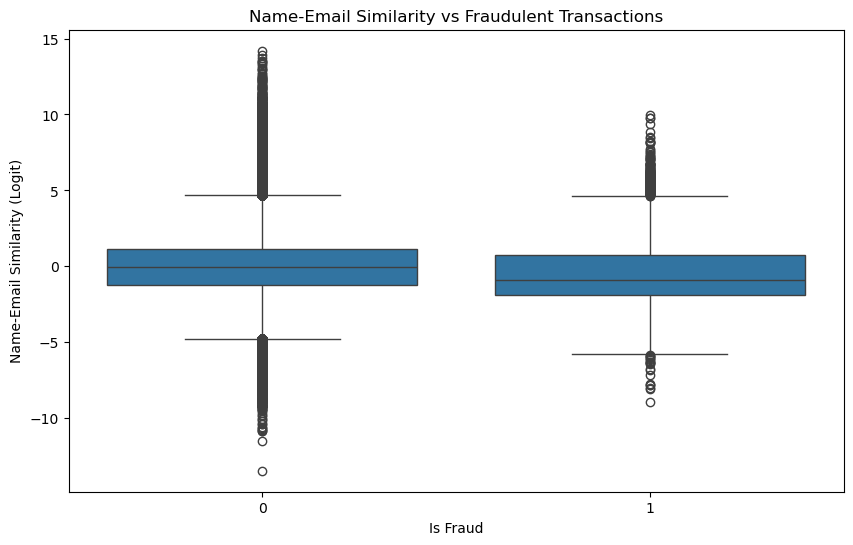

In [72]:
# Create a figure between (X) name_email_similarity_logit and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='name_email_similarity_logit', data=dataset)
plt.title('Name-Email Similarity vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Name-Email Similarity (Logit)')
plt.show()

**Slight** indication that the less similarity may indicate more chances of fraud.

### days_since_request

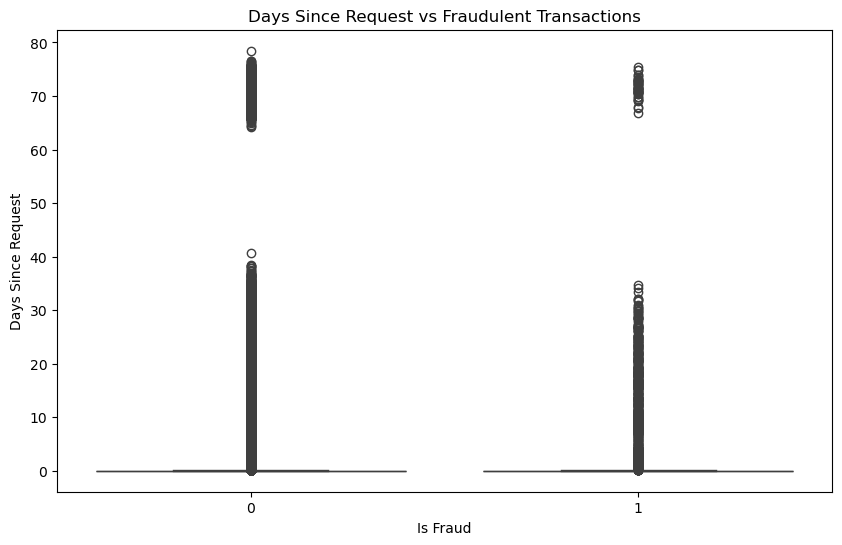

In [73]:
# Create a figure between (X) days_since_request and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='days_since_request', data=dataset)
plt.title('Days Since Request vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Days Since Request')
plt.show()


In [74]:
dataset=dataset.drop(columns=["days_since_request"],axis='columns')

### intended_balcon_amount

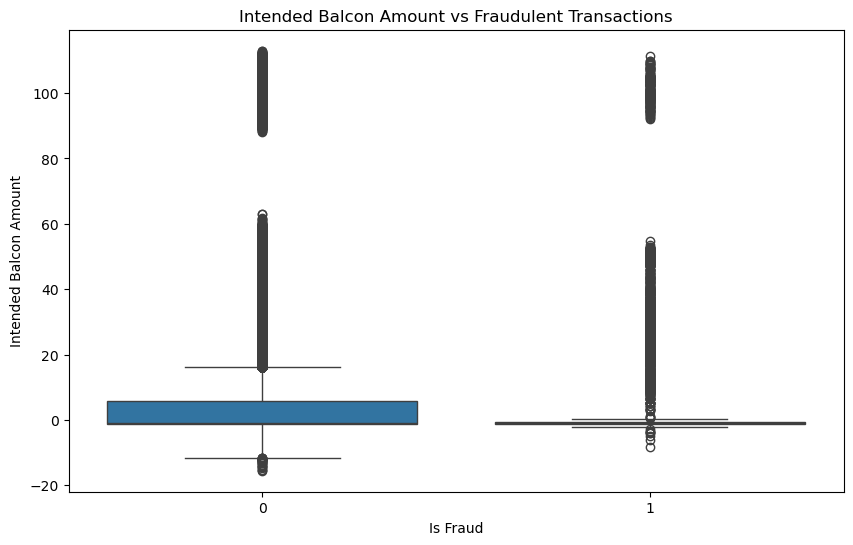

In [75]:
# Create a figure between (X) days_since_request and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='intended_balcon_amount', data=dataset)
plt.title('Intended Balcon Amount vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Intended Balcon Amount')
plt.show()


**Difficult** to identify a meaningful association here, probably the categorical variable will be more indicative.

In [76]:
dataset=dataset.drop(columns="intended_balcon_amount",axis='columns')

### log_velocity_6h_imputed

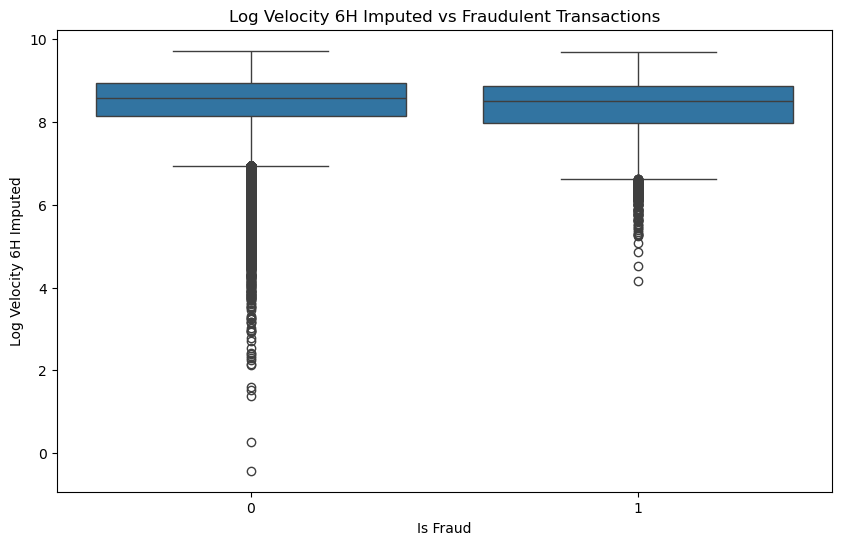

In [77]:
# Create a figure between (X) log_velocity_6h_imputed and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='log_velocity_6h_imputed', data=dataset)
plt.title('Log Velocity 6H Imputed vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Log Velocity 6H Imputed')
plt.show()


In [ ]:
dataset=dataset.drop(columns=["log_velocity_6h_imputed","velocity_6h_imputed"],axis='columns')


In [149]:
dataset=dataset.drop(columns=["velocity_6h_imputed"],axis='columns')


### Velocity 24h

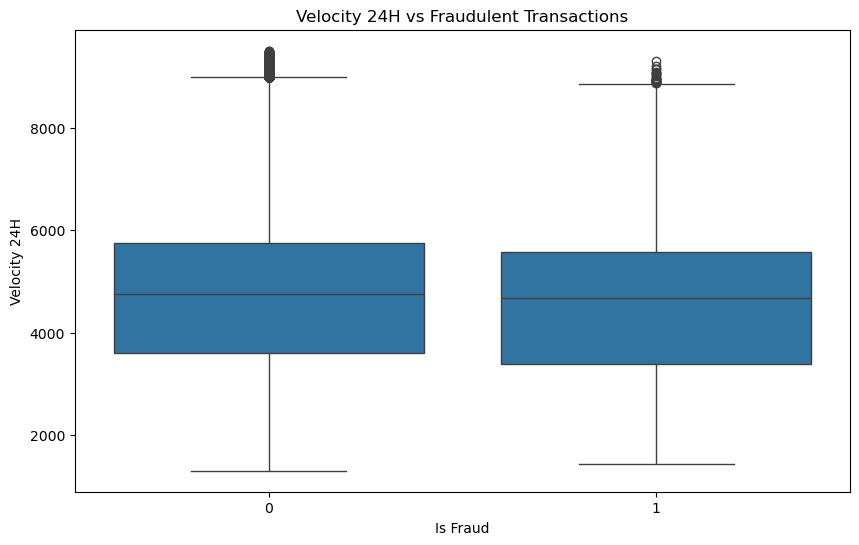

In [79]:
# Create a figure between (X) velocity_24h and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='velocity_24h', data=dataset)
plt.title('Velocity 24H vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Velocity 24H')
plt.show()

In [80]:
dataset=dataset.drop(columns="velocity_24h",axis='columns')

### velocity_4w

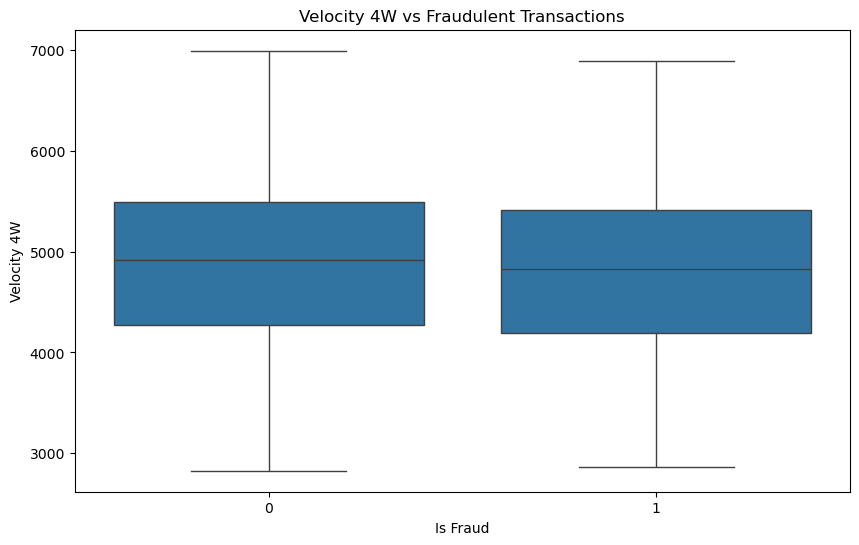

In [81]:
# Create a figure between (X) velocity_4w and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='velocity_4w', data=dataset)
plt.title('Velocity 4W vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Velocity 4W')
plt.show()

In [82]:
dataset=dataset.drop(columns="velocity_4w",axis='columns')

In [83]:
dataset=dataset.drop(columns=["velocity_24h_log","velocity_4w_log"],axis='columns')

**Not meaningful relationship** between velocity_6h, velocity_24h and velocity_4w are and fraud bool.

### Bank_branch_count_8w

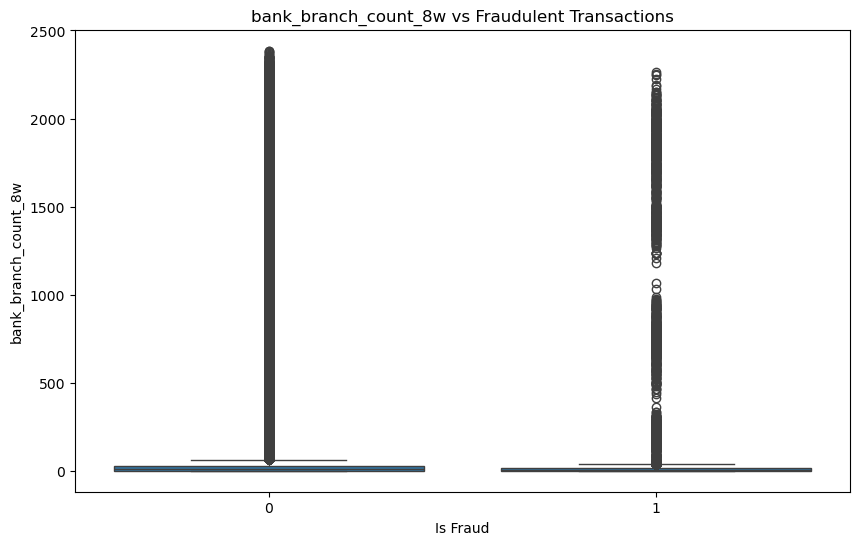

In [84]:
# Create a figure between (X) bank_months_count and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='bank_branch_count_8w', data=dataset)
plt.title('bank_branch_count_8w vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('bank_branch_count_8w')
plt.show()


**no significant association**

In [85]:
dataset=dataset.drop(columns="bank_branch_count_8w",axis='columns')

### date_of_birth_distinct_emails_4w

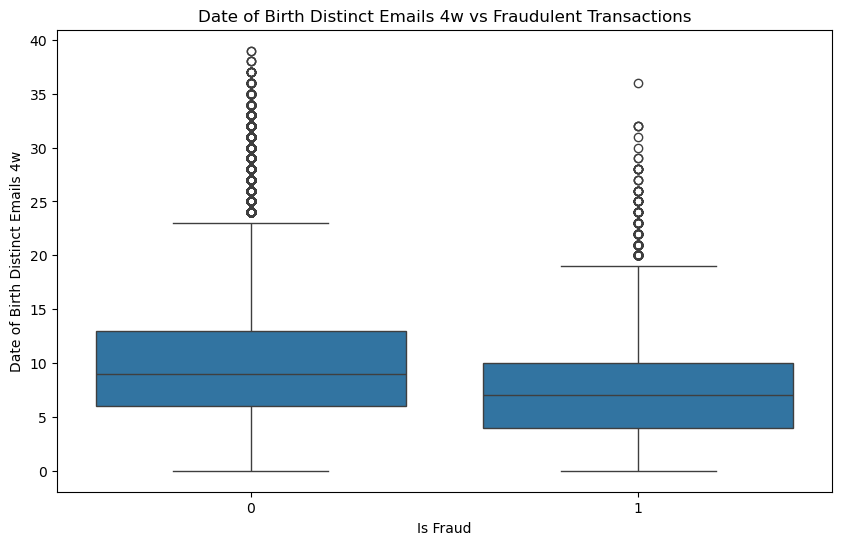

In [86]:
# Create a figure between (X) date_of_birth_distinct_emails_4w and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='date_of_birth_distinct_emails_4w', data=dataset)
plt.title('Date of Birth Distinct Emails 4w vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Date of Birth Distinct Emails 4w')
plt.show()


**Slight** indication that the when a user has **rare** birth date may be indication of fraud (?)

### credit_risk_score

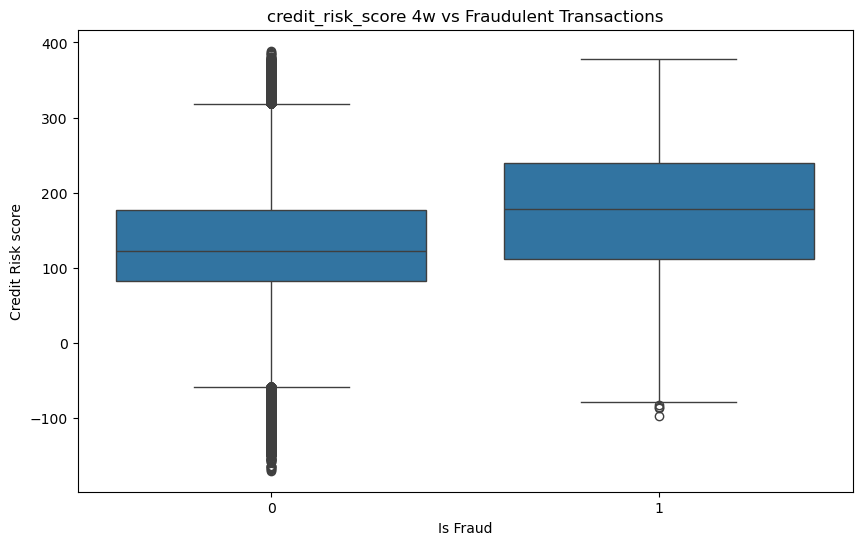

In [87]:
# Create a figure between (X) credit_risk_score and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='credit_risk_score', data=dataset)
plt.title('credit_risk_score 4w vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Credit Risk score')
plt.show()


**Significant** relationship by the means of that the higher riskier is the credit of customer, the more chances to be fraud.

### bank_months_count

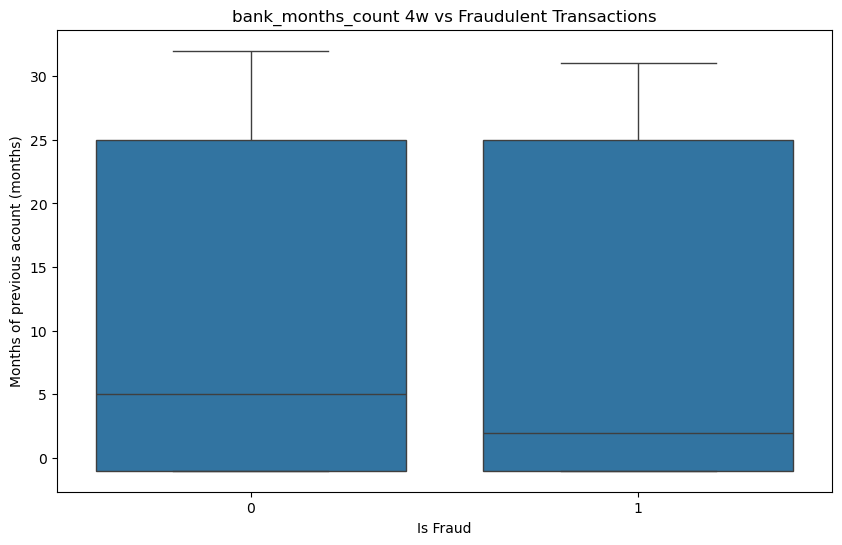

In [88]:
# Create a figure between (X) bank_months_count and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='bank_months_count', data=dataset)
plt.title('bank_months_count 4w vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Months of previous acount (months)')
plt.show()


**Slight** indicationt hat the more recent is the account the more chances of fraud. **However**, the binary discretized variable will demonstrate better the potential association with fraudulent.

In [89]:
dataset=dataset.drop(columns="bank_months_count",axis='columns')

### zip_count_4w_log

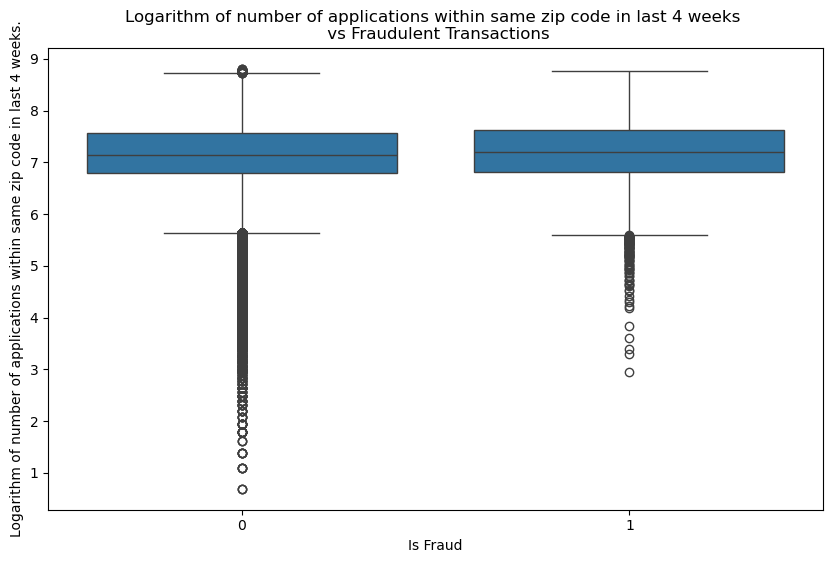

In [90]:
# Create a figure between (X) zip_count_4w_log and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='zip_count_4w_log', data=dataset)
plt.title('Logarithm of number of applications within same zip code in last 4 weeks \n vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Logarithm of number of applications within same zip code in last 4 weeks.')
plt.show()


**Not** meaningful association between number of same zip code of customer with fraudulent applications.

In [91]:
dataset=dataset.drop(columns="zip_count_4w_log",axis='columns')

### customer age

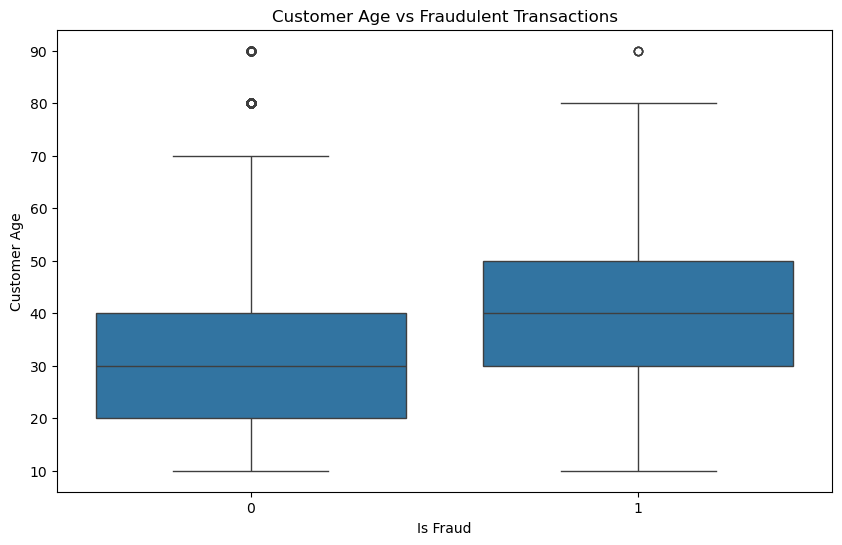

In [92]:
# Create a figure between (X) customer_age and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='customer_age', data=dataset)
plt.title('Customer Age vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Customer Age')
plt.show()


**Slightly** positive relationship by the means of that until age 30-35 it seems that there is less fraud detection rate but ages>35 indicate more chances for fraud detection.

### log_session_length_in_minutes

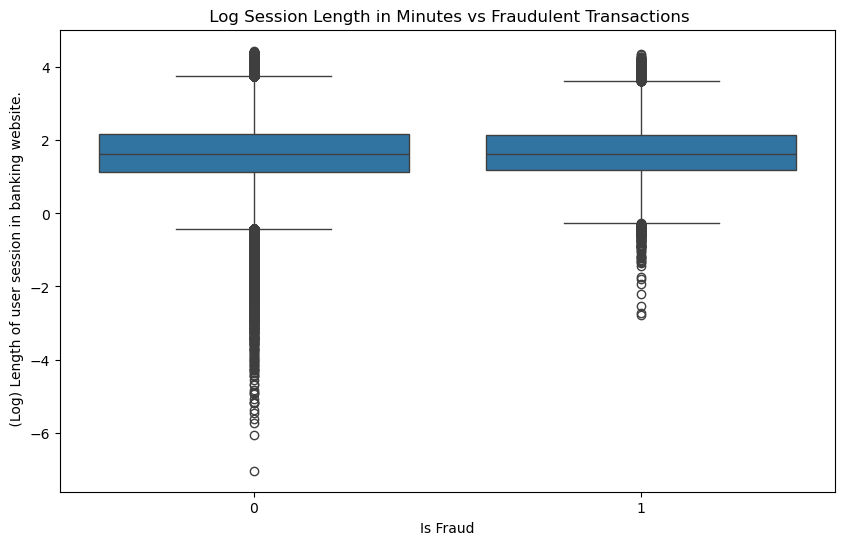

In [93]:
# Create a figure between (X) log_session_length_in_minutes_imputed and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='log_session_length_in_minutes_imputed', data=dataset)
plt.title(' Log Session Length in Minutes vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' (Log) Length of user session in banking website.')
plt.show()

**Not improtant relationship** since across range of fraud cases regarding session length in minutes, there is not an apparent separation between fraud and non fraud cases.

In [94]:
dataset=dataset.drop(columns="log_session_length_in_minutes_imputed",axis='columns')

### proposed_credit_limit

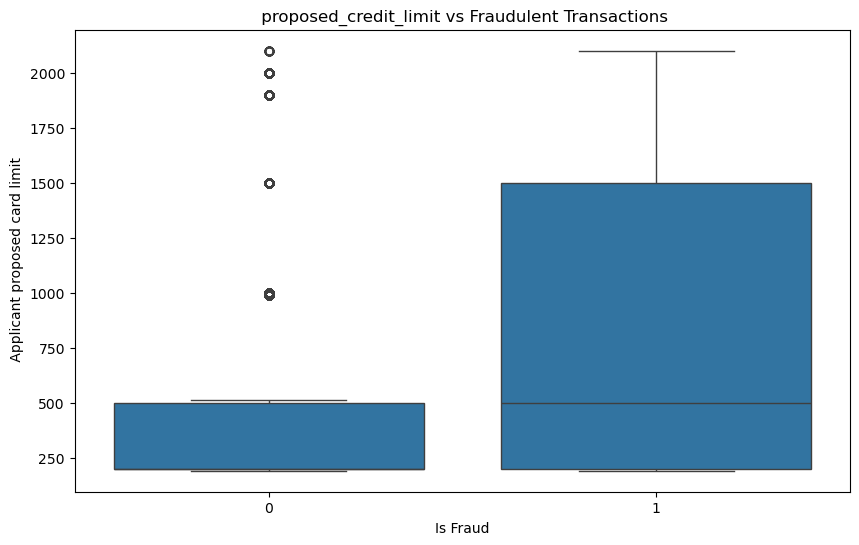

In [95]:
# Create a figure between (X) proposed_credit_limit and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='proposed_credit_limit', data=dataset)
plt.title(' proposed_credit_limit vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' Applicant proposed card limit')
plt.show()

**Meaningful** association between proposed credit limit and fraud.

### Inference in continuous variables

**Important relationships**

1) date_of_birth_distinct_emails_8w
2) credit_risk_score
3) Customer age (**however** to check binned corresponding feature.)
4) logit_name_email_similarity
5) Proposed credit limit (**however** to check binned corresponding feature.)

## Exploratory analysis of categorical/ordinal variables

### income

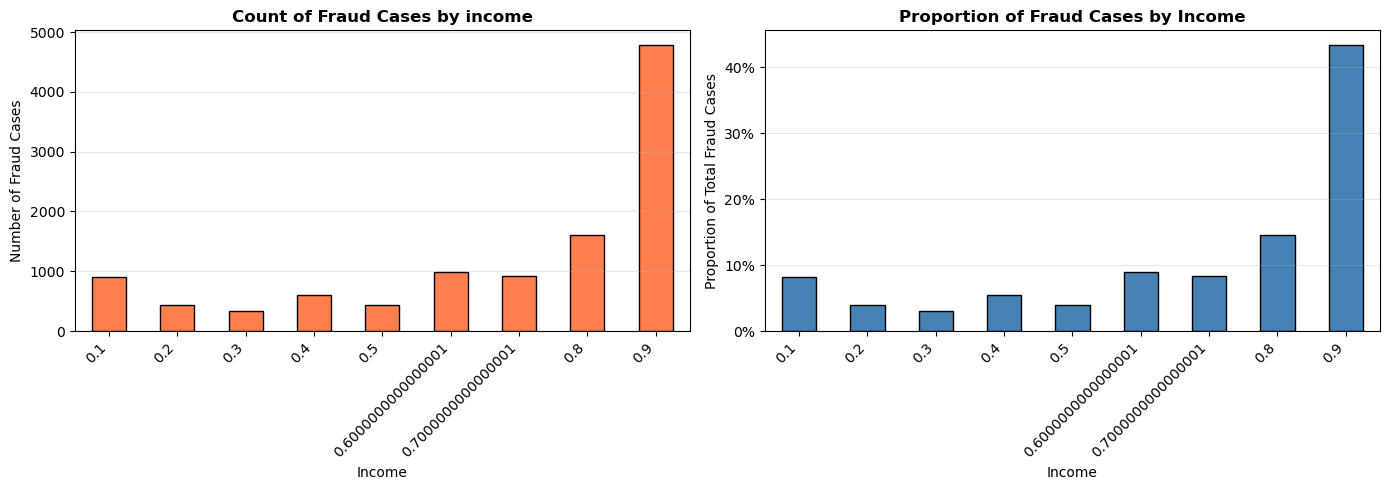


=== Fraud Cases Distribution by Payment Type ===
 Income  Count  Proportion  Percentage
    0.1    909    0.082419        8.24
    0.2    438    0.039713        3.97
    0.3    338    0.030646        3.06
    0.4    597    0.054130        5.41
    0.5    444    0.040258        4.03
    0.6    983    0.089129        8.91
    0.7    927    0.084051        8.41
    0.8   1602    0.145253       14.53
    0.9   4791    0.434400       43.44

=== Non-Fraud Cases Distribution by Payment Type ===
 Income  Count  Proportion  Percentage
    0.1 156540    0.158286       15.83
    0.2  68907    0.069675        6.97
    0.3  50495    0.051058        5.11
    0.4  80767    0.081668        8.17
    0.5  55414    0.056032        5.60
    0.6 110990    0.112228       11.22
    0.7 104182    0.105344       10.53
    0.8 145048    0.146666       14.67
    0.9 216628    0.219044       21.90


In [96]:
# Filter for fraud cases only (fraud_bool==1)
fraud_cases = dataset[dataset['fraud_bool'] == 1]
non_fraud_cases = dataset[dataset['fraud_bool'] == 0]
# Count fraud cases in each days_since_request_binned category
fraud_by_bin_income = fraud_cases['income'].value_counts().sort_index()
non_fraud_by_bin_income = non_fraud_cases['income'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_income = fraud_by_bin_income / fraud_by_bin_income.sum()
non_fraud_by_bin_of_income_proportions = non_fraud_by_bin_income / non_fraud_by_bin_income.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_income.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by income', fontsize=12, fontweight='bold')
ax1.set_xlabel('Income')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_income.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Income', fontsize=12, fontweight='bold')
ax2.set_xlabel('Income')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by Payment Type ===")
summary_df_fraud_by_income = pd.DataFrame({
    'Income': fraud_by_bin_income.index,
    'Count': fraud_by_bin_income.values,
    'Proportion': fraud_proportions_by_bin_of_income.values,
    'Percentage': (fraud_proportions_by_bin_of_income.values * 100).round(2)
})
print(summary_df_fraud_by_income.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Payment Type ===")
summary_df_non_fraud_by_income = pd.DataFrame({
    'Income': non_fraud_by_bin_income.index,
    'Count': non_fraud_by_bin_income.values,
    'Proportion': non_fraud_by_bin_of_income_proportions.values,
    'Percentage': (non_fraud_by_bin_of_income_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_income.to_string(index=False))

**Important association** by the means of that the income of level 0.9 presents high fraud rate while for less than 0.9 the chances are to be non-fraud. Potential further binning here may help. Also, a target encoding could also help.

In [97]:
dataset["income_level"]=np.where(dataset["income"]<0.9,"<0.9","0.9")


In [98]:
dataset=dataset.drop(columns="income",axis='columns')

### customer_age

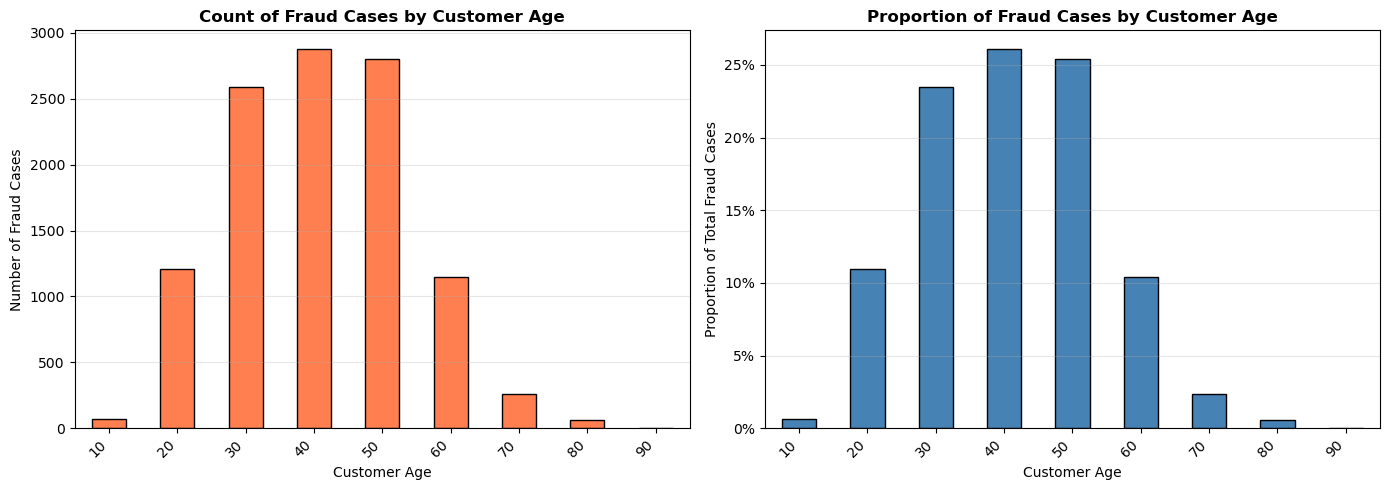


=== Fraud Cases Distribution by Customer age
 Customer age  Count  Proportion  Percentage
           10     74    0.006710        0.67
           20   1205    0.109257       10.93
           30   2589    0.234745       23.47
           40   2876    0.260767       26.08
           50   2805    0.254329       25.43
           60   1149    0.104180       10.42
           70    263    0.023846        2.38
           80     64    0.005803        0.58
           90      4    0.000363        0.04

=== Non-Fraud Cases Distribution by Customer Age
 Customer age  Count  Proportion  Percentage
           10  20913    0.021146        2.11
           20 244650    0.247378       24.74
           30 308844    0.312288       31.23
           40 235836    0.238466       23.85
           50 137548    0.139082       13.91
           60  33621    0.033996        3.40
           70   6254    0.006324        0.63
           80   1233    0.001247        0.12
           90     72    0.000073        0.01


In [99]:
# Filter for fraud cases only (fraud_bool==1)
fraud_cases = dataset[dataset['fraud_bool'] == 1]
non_fraud_cases = dataset[dataset['fraud_bool'] == 0]
# Count fraud cases in each days_since_request_binned category
fraud_by_bin_customer_age = fraud_cases['customer_age'].value_counts().sort_index()
non_fraud_by_bin_customer_age = non_fraud_cases['customer_age'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_customer_age = fraud_by_bin_customer_age / fraud_by_bin_customer_age.sum()
non_fraud_by_bin_of_customer_age_proportions = non_fraud_by_bin_customer_age / non_fraud_by_bin_customer_age.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_customer_age.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by Customer Age', fontsize=12, fontweight='bold')
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_customer_age.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Customer Age', fontsize=12, fontweight='bold')
ax2.set_xlabel('Customer Age')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
# Print summary table
print("\n=== Fraud Cases Distribution by Customer age")
summary_df_fraud_by_customer_age = pd.DataFrame({
    'Customer age': fraud_by_bin_customer_age.index,
    'Count': fraud_by_bin_customer_age.values,
    'Proportion': fraud_proportions_by_bin_of_customer_age.values,
    'Percentage': (fraud_proportions_by_bin_of_customer_age.values * 100).round(2)
})
print(summary_df_fraud_by_customer_age.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Customer Age")
summary_df_non_fraud_by_customer_age = pd.DataFrame({
    'Customer age': non_fraud_by_bin_customer_age.index,
    'Count': non_fraud_by_bin_customer_age.values,
    'Proportion': non_fraud_by_bin_of_customer_age_proportions.values,
    'Percentage': (non_fraud_by_bin_of_customer_age_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_customer_age.to_string(index=False))

**Ages until 40"** are more chances to be non fraud while >40 tend to be more fraud. **Consider further binning** and target encoding

In [100]:
dataset["customer_age_binned"]=np.where(dataset["customer_age"]>40,">40 (More fraud)","<=40 (less fraud)")

In [101]:
dataset=dataset.drop(columns="customer_age",axis='columns')

### payment_type

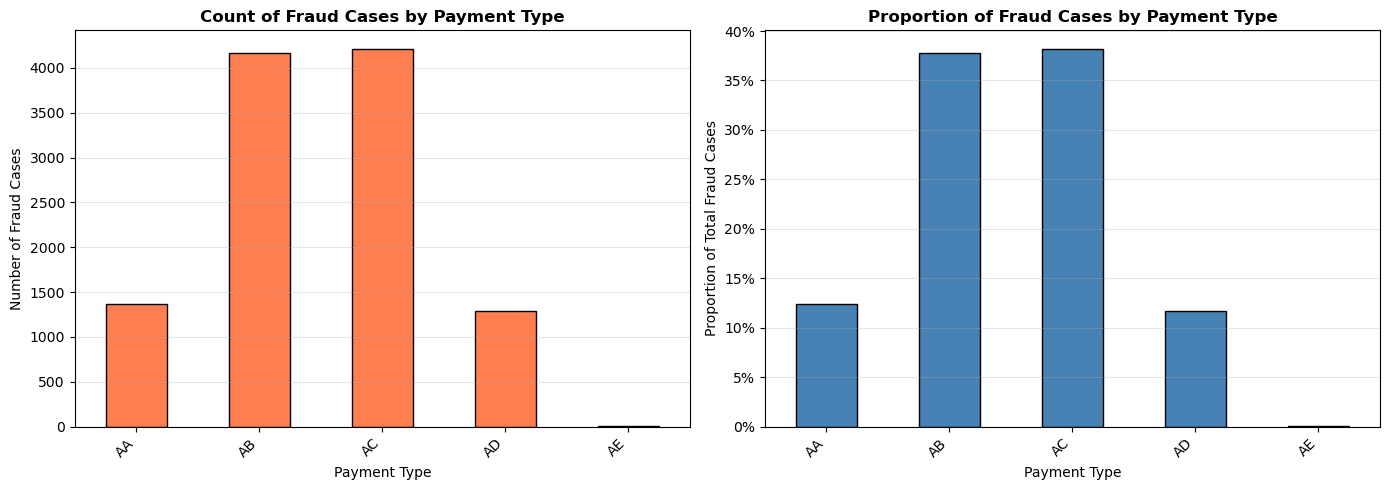


=== Fraud Cases Distribution by Payment Type ===
Payment Type  Count  Proportion  Percentage
          AA   1364    0.123674       12.37
          AB   4169    0.378003       37.80
          AC   4209    0.381630       38.16
          AD   1286    0.116602       11.66
          AE      1    0.000091        0.01

=== Non-Fraud Cases Distribution by Payment Type ===
Payment Type  Count  Proportion  Percentage
          AA 256885    0.259750       25.97
          AB 366385    0.370471       37.05
          AC 247862    0.250626       25.06
          AD 117551    0.118862       11.89
          AE    288    0.000291        0.03


In [102]:
# Filter for fraud cases only (fraud_bool==1)
fraud_cases = dataset[dataset['fraud_bool'] == 1]
non_fraud_cases = dataset[dataset['fraud_bool'] == 0]
# Count fraud cases in each days_since_request_binned category
fraud_by_bin_payment_type = fraud_cases['payment_type'].value_counts().sort_index()
non_fraud_by_bin_payment_type = non_fraud_cases['payment_type'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_payment_type = fraud_by_bin_payment_type / fraud_by_bin_payment_type.sum()
non_fraud_by_bin_of_payment_type_proportions = non_fraud_by_bin_payment_type / non_fraud_by_bin_payment_type.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_payment_type.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by Payment Type', fontsize=12, fontweight='bold')
ax1.set_xlabel('Payment Type')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_payment_type.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Payment Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Payment Type')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by Payment Type ===")
summary_df_fraud_by_payment_type = pd.DataFrame({
    'Payment Type': fraud_by_bin_payment_type.index,
    'Count': fraud_by_bin_payment_type.values,
    'Proportion': fraud_proportions_by_bin_of_payment_type.values,
    'Percentage': (fraud_proportions_by_bin_of_payment_type.values * 100).round(2)
})
print(summary_df_fraud_by_payment_type.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Payment Type ===")
summary_df_non_fraud_by_payment_type = pd.DataFrame({
    'Payment Type': non_fraud_by_bin_payment_type.index,
    'Count': non_fraud_by_bin_payment_type.values,
    'Proportion': non_fraud_by_bin_of_payment_type_proportions.values,
    'Percentage': (non_fraud_by_bin_of_payment_type_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_payment_type.to_string(index=False))

**Slight** difference in AA, AC Cases since in AA type the fraud detection rate seems to be half of non-fraud corresponding rate and vice versa of AC. The remaining cases are having same influence ==> need to aggregate the cases in other categories.

In [103]:
# We want to create payment_type_engineered including only classes of AA, AC and all other ones to be grouped as 'Other'
dataset["payment_type_engineered"]=np.where(~dataset["payment_type"].isin(['AA', 'AC']),"Other",dataset["payment_type"])

In [104]:
dataset=dataset.drop(columns="payment_type",axis='columns')

### employment_status

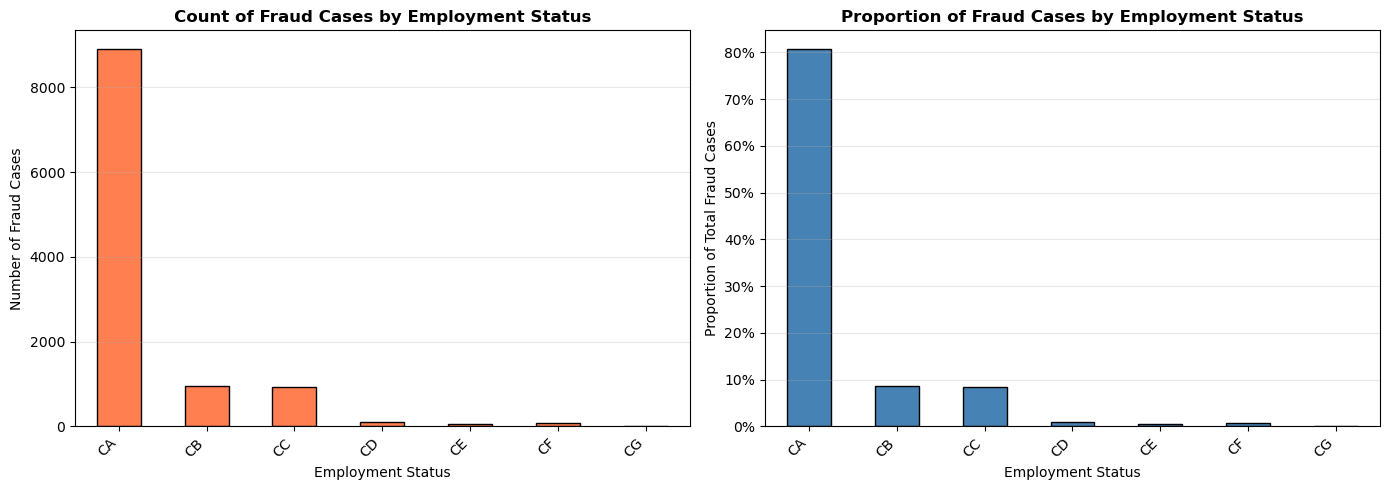


=== Fraud Cases Distribution by Employment Status ===
Employment Status  Count  Proportion  Percentage
               CA   8899    0.806873       80.69
               CB    953    0.086409        8.64
               CC    932    0.084504        8.45
               CD    100    0.009067        0.91
               CE     53    0.004806        0.48
               CF     85    0.007707        0.77
               CG      7    0.000635        0.06

=== Non-Fraud Cases Distribution by Employment Status ===
Employment Status  Count  Proportion  Percentage
               CA 721353    0.729398       72.94
               CB 137335    0.138867       13.89
               CC  36826    0.037237        3.72
               CD  26422    0.026717        2.67
               CE  22640    0.022892        2.29
               CF  43949    0.044439        4.44
               CG    446    0.000451        0.05


In [105]:
# Count fraud cases in each days_since_request_binned category
fraud_by_bin_employment_status = fraud_cases['employment_status'].value_counts().sort_index()
non_fraud_by_bin_employment_status = non_fraud_cases['employment_status'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_employment_status = fraud_by_bin_employment_status / fraud_by_bin_employment_status.sum()
non_fraud_by_bin_of_employment_status_proportions = non_fraud_by_bin_employment_status / non_fraud_by_bin_employment_status.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_employment_status.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by Employment Status', fontsize=12, fontweight='bold')
ax1.set_xlabel('Employment Status')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_employment_status.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Employment Status', fontsize=12, fontweight='bold')
ax2.set_xlabel('Employment Status')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by Employment Status ===")
summary_df_fraud_by_employment_status = pd.DataFrame({
    'Employment Status': fraud_by_bin_employment_status.index,
    'Count': fraud_by_bin_employment_status.values,
    'Proportion': fraud_proportions_by_bin_of_employment_status.values,
    'Percentage': (fraud_proportions_by_bin_of_employment_status.values * 100).round(2)
})
print(summary_df_fraud_by_employment_status.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Employment Status ===")
summary_df_non_fraud_by_employment_status = pd.DataFrame({
    'Employment Status': non_fraud_by_bin_employment_status.index,
    'Count': non_fraud_by_bin_employment_status.values,
    'Proportion': non_fraud_by_bin_of_employment_status_proportions.values,
    'Percentage': (non_fraud_by_bin_of_employment_status_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_employment_status.to_string(index=False))


In [106]:

# Visualise through stacked barchart the relative proportions of fraud (1 or 0) per employment_status. In essence, we want to see how the cases of fraud are distributed (in terms of proportins) per class and how the non-fraud cases are distributed per class.
employment_status_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
employment_status_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['employment_status'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['employment_status'].value_counts()  
fraud_proportions = fraud_counts / employment_status_counts_fraud
non_fraud_proportions = non_fraud_counts / employment_status_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)


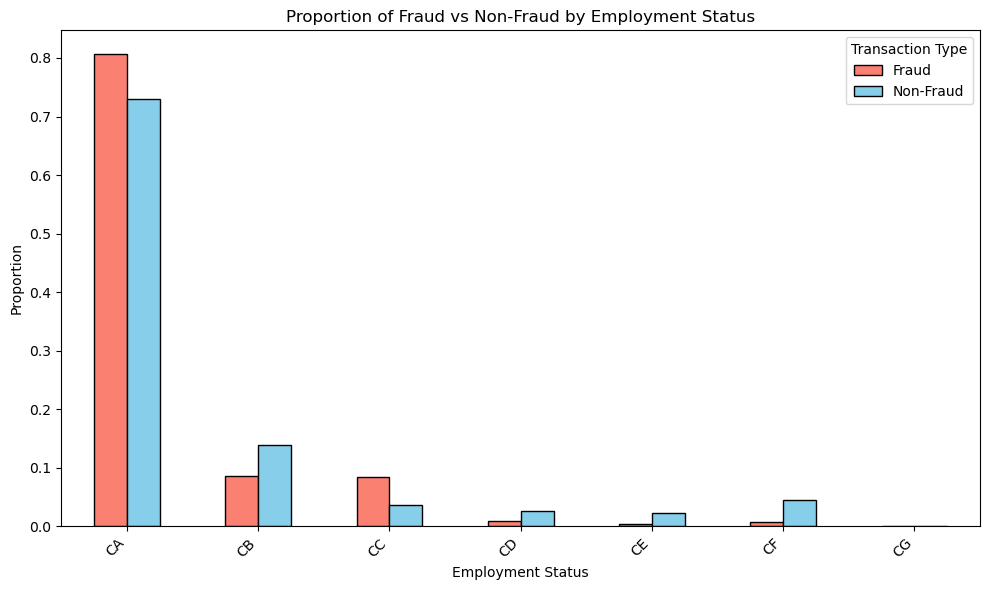

In [107]:
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

Apart from class **CG**, in the other ones the proportion of fraud vs non fraud differentiates=> indication that this is **strong factor**. We can combine classes together since they have similar behavior and in parallel increase the sample size 

In [108]:
# We want to create payment_type_engineered including only classes of AA, AC and all other ones to be grouped as 'Other'
dataset['employment_status_engineered']=np.where(~dataset["employment_status"].isin(['CA', 'CB','CC']),'CD_CE_CF_CG',dataset["employment_status"])

In [109]:
dataset=dataset.drop(columns="employment_status",axis='columns')

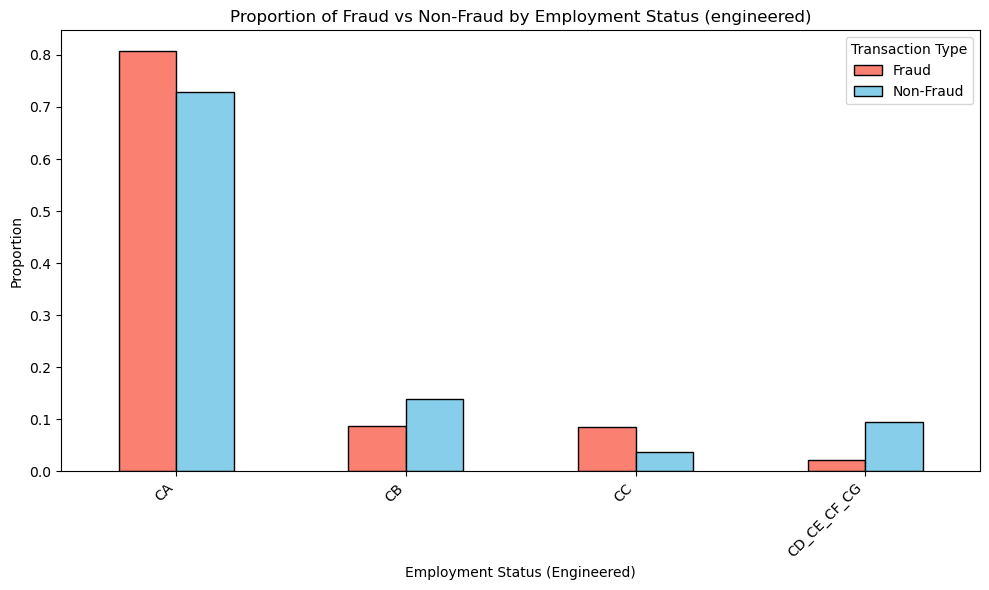

In [110]:
fraud_counts = dataset[dataset['fraud_bool'] == 1]['employment_status_engineered'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['employment_status_engineered'].value_counts()  
fraud_proportions = fraud_counts / employment_status_counts_fraud
non_fraud_proportions = non_fraud_counts / employment_status_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by Employment Status (engineered)')
plt.xlabel('Employment Status (Engineered)')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

### email_is_free

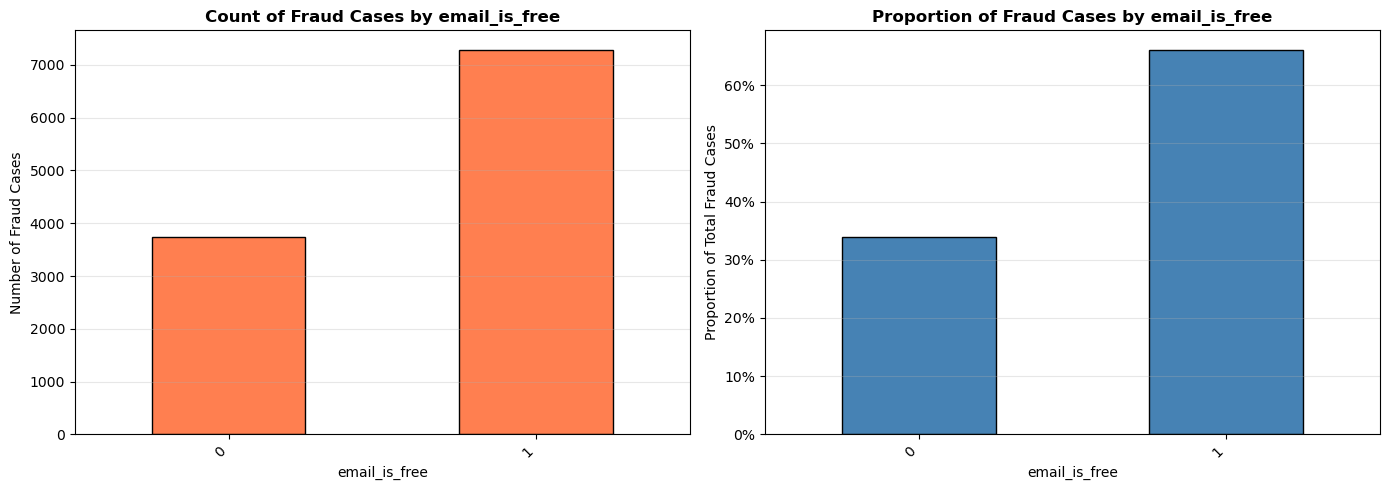


=== Fraud Cases Distribution by email_is_free ===
 email_is_free  Count  Proportion  Percentage
             0   3738    0.338925       33.89
             1   7291    0.661075       66.11

=== Non-Fraud Cases Distribution by email_is_free ===
 email_is_free  Count  Proportion  Percentage
             0 466376    0.471577       47.16
             1 522595    0.528423       52.84


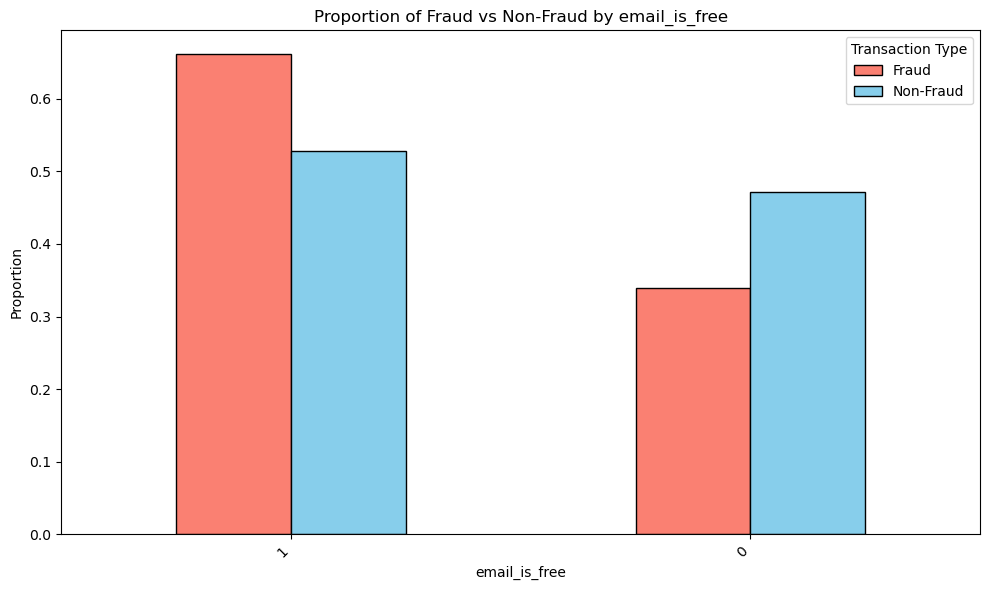

In [111]:

# Count fraud cases in each days_since_request_binned category
fraud_by_bin_email_is_free = fraud_cases['email_is_free'].value_counts().sort_index()
non_fraud_by_bin_email_is_free = non_fraud_cases['email_is_free'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_email_is_free = fraud_by_bin_email_is_free / fraud_by_bin_email_is_free.sum()
non_fraud_by_bin_of_email_is_free_proportions = non_fraud_by_bin_email_is_free / non_fraud_by_bin_email_is_free.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_email_is_free.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by email_is_free', fontsize=12, fontweight='bold')
ax1.set_xlabel('email_is_free')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_email_is_free.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by email_is_free', fontsize=12, fontweight='bold')
ax2.set_xlabel('email_is_free')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by email_is_free ===")
summary_df_fraud_by_email_is_free = pd.DataFrame({
    'email_is_free': fraud_by_bin_email_is_free.index,
    'Count': fraud_by_bin_email_is_free.values,
    'Proportion': fraud_proportions_by_bin_of_email_is_free.values,
    'Percentage': (fraud_proportions_by_bin_of_email_is_free.values * 100).round(2)
})
print(summary_df_fraud_by_email_is_free.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by email_is_free ===")
summary_df_non_fraud_by_email_is_free = pd.DataFrame({
    'email_is_free': non_fraud_by_bin_email_is_free.index,
    'Count': non_fraud_by_bin_email_is_free.values,
    'Proportion': non_fraud_by_bin_of_email_is_free_proportions.values,
    'Percentage': (non_fraud_by_bin_of_email_is_free_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_email_is_free.to_string(index=False))
# Visualise through stacked barchart the relative proportions of fraud (1 or 0) per email_is_free. In essence, we want to see how the cases of fraud are distributed (in terms of proportins) per class and how the non-fraud cases are distributed per class.
email_is_free_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
email_is_free_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['email_is_free'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['email_is_free'].value_counts()  
fraud_proportions = fraud_counts / email_is_free_counts_fraud
non_fraud_proportions = non_fraud_counts / email_is_free_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by email_is_free')
plt.xlabel('email_is_free')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

**Inference** The users with paid e-mails tend to be more credible customers (non fraud cases). **Strong association** between fraud users and free e-mails.

### housing_status

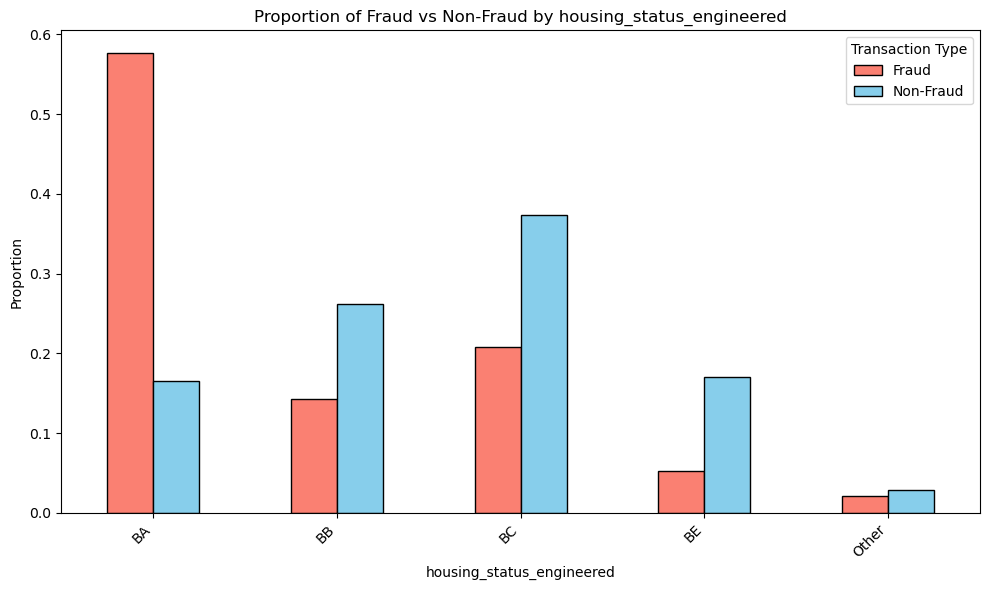


=== Fraud Cases Distribution by housing_status_engineered ===
housing_status_engineered  Count  Proportion  Percentage
                       BA   6357    0.576390       57.64
                       BC   2288    0.207453       20.75
                       BB   1568    0.142171       14.22
                       BE    582    0.052770        5.28
                    Other    234    0.021217        2.12

=== Non-Fraud Cases Distribution by housing_status_engineered ===
housing_status_engineered  Count  Proportion  Percentage
                       BC 369855    0.373980       37.40
                       BB 259397    0.262290       26.23
                       BE 168553    0.170433       17.04
                       BA 163318    0.165139       16.51
                    Other  27848    0.028159        2.82


In [112]:
housing_status_engineered_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
housing_status_engineered_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['housing_status_engineered'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['housing_status_engineered'].value_counts()  
fraud_proportions = fraud_counts / housing_status_engineered_counts_fraud
non_fraud_proportions = non_fraud_counts / housing_status_engineered_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by housing_status_engineered')
plt.xlabel('housing_status_engineered')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by housing_status_engineered ===")
summary_df_fraud_by_housing_status = pd.DataFrame({
    'housing_status_engineered': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_housing_status.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by housing_status_engineered ===")
summary_df_non_fraud_by_housing_status = pd.DataFrame({
    'housing_status_engineered': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_housing_status.to_string(index=False))

**Strong association** between housing status (after further binning) with fraud detection.

In [113]:
dataset=dataset.drop(columns="housing_status",axis='columns')

### foreign_request

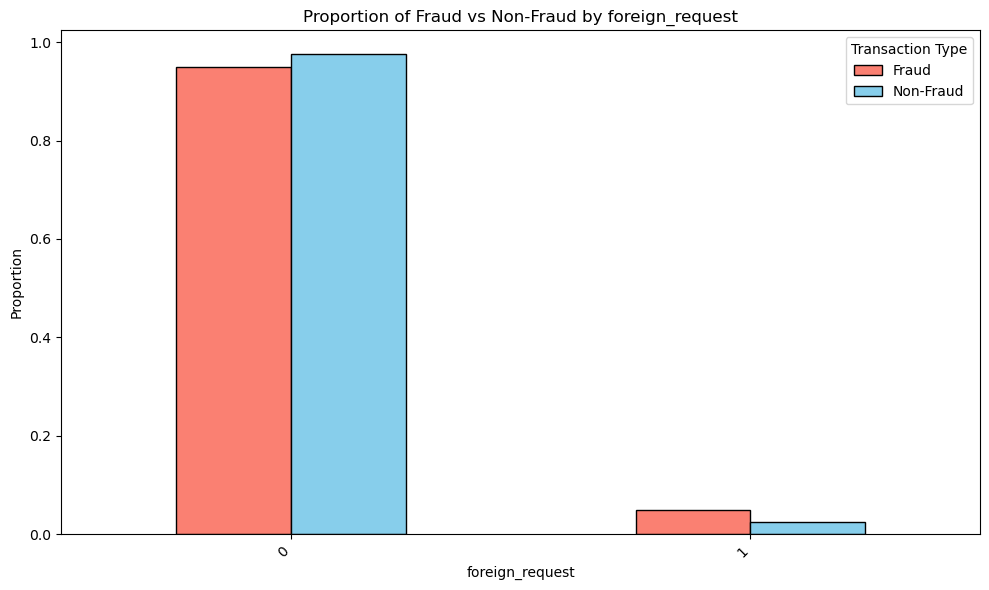


=== Fraud Cases Distribution by foreign_request ===
 foreign_request  Count  Proportion  Percentage
               0  10474    0.949678       94.97
               1    555    0.050322        5.03

=== Non-Fraud Cases Distribution by foreign_request ===
 foreign_request  Count  Proportion  Percentage
               0 964284    0.975038        97.5
               1  24687    0.024962         2.5


In [114]:
foreign_request_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
foreign_request_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['foreign_request'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['foreign_request'].value_counts()  
fraud_proportions = fraud_counts / foreign_request_counts_fraud
non_fraud_proportions = non_fraud_counts / foreign_request_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by foreign_request')
plt.xlabel('foreign_request')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by foreign_request ===")
summary_df_fraud_by_foreign_request = pd.DataFrame({
    'foreign_request': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_foreign_request.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by foreign_request ===")
summary_df_non_fraud_by_foreign_request = pd.DataFrame({
    'foreign_request': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_foreign_request.to_string(index=False))

**Little significant** association by the means that the foreign requests may tend to be little more fraud than non foreign ones.

### Phone_home_valid, phone_mobile_valid and their_interaction

In [115]:
dataset['phone_home_and_mobile_valid'].value_counts()

phone_home_and_mobile_valid
Invalid_Valid      560691
Valid_Valid        328985
Valid_Invalid       88092
Invalid_Invalid     22232
Name: count, dtype: int64

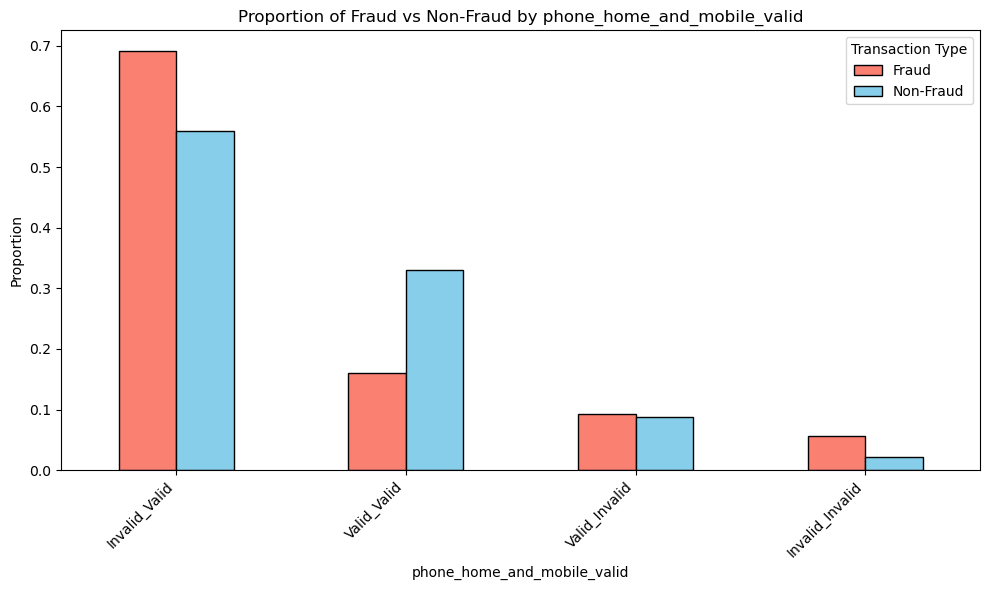


=== Fraud Cases Distribution by phone_home_and_mobile_valid
phone_home_and_mobile_valid  Count  Proportion  Percentage
              Invalid_Valid   7619    0.690815       69.08
                Valid_Valid   1762    0.159761       15.98
              Valid_Invalid   1029    0.093299        9.33
            Invalid_Invalid    619    0.056125        5.61

=== Non-Fraud Cases Distribution by phone_home_and_mobile_valid
phone_home_and_mobile_valid  Count  Proportion  Percentage
              Invalid_Valid 553072    0.559240       55.92
                Valid_Valid 327223    0.330872       33.09
              Valid_Invalid  87063    0.088034        8.80
            Invalid_Invalid  21613    0.021854        2.19


In [116]:
phone_home_mobile_valid_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
phone_home_mobile_valid_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['phone_home_and_mobile_valid'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['phone_home_and_mobile_valid'].value_counts()  
fraud_proportions = fraud_counts / phone_home_mobile_valid_counts_fraud
non_fraud_proportions = non_fraud_counts / phone_home_mobile_valid_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by phone_home_and_mobile_valid')
plt.xlabel('phone_home_and_mobile_valid')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by phone_home_and_mobile_valid")
summary_df_fraud_by_phone_home_mobile_valid = pd.DataFrame({
    'phone_home_and_mobile_valid': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_phone_home_mobile_valid.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by phone_home_and_mobile_valid")
summary_df_non_fraud_by_phone_home_mobile_valid = pd.DataFrame({
    'phone_home_and_mobile_valid': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_phone_home_mobile_valid.to_string(index=False))

**Inference**: All cases with either/both invalid home or/and mobile are showing favoritism to fraud. **Important factor**.

In [117]:
dataset.head(2)

,fraud_bool,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,proposed_credit_limit,foreign_request,source,device_os,keep_alive_session,device_distinct_emails_8w,...,prev_address_months_count_binary,bank_months_count_binary,customer_profile,residential_history_stability,banking_relationship_stability,velocity_6h_imputed,income_level,customer_age_binned,payment_type_engineered,employment_status_engineered
0,0,5,163,1,1500.0,0,INTERNET,linux,1,1,...,prev_address_missing,bank_months_valid,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,13096.035018,<0.9,<=40 (less fraud),AA,CB
1,0,18,154,1,1500.0,0,INTERNET,other,1,1,...,prev_address_missing,bank_months_valid,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,9223.283431,<0.9,<=40 (less fraud),Other,CA


### proposed_credit_limit_binned

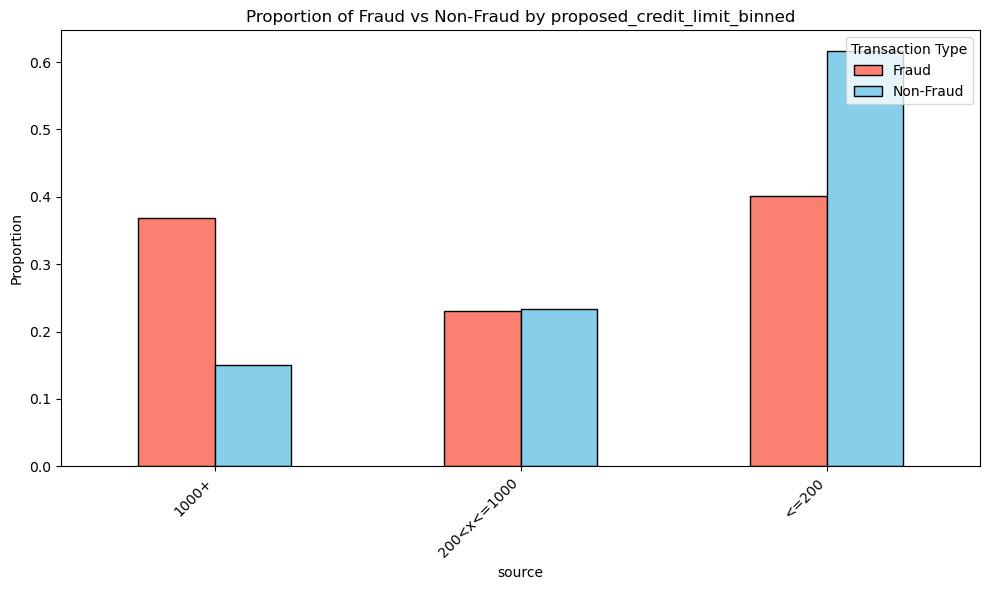


=== Fraud Cases Distribution by proposed_credit_limit_binned
     source  Count  Proportion  Percentage
      <=200   4425    0.401215       40.12
      1000+   4061    0.368211       36.82
200<x<=1000   2543    0.230574       23.06

=== Non-Fraud Cases Distribution by proposed_credit_limit_binned
     source  Count  Proportion  Percentage
      <=200 609592    0.616390       61.64
200<x<=1000 231160    0.233738       23.37
      1000+ 148219    0.149872       14.99


In [118]:
proposed_credit_limit_binned_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
proposed_credit_limit_binned_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['proposed_credit_limit_binned'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['proposed_credit_limit_binned'].value_counts()  
fraud_proportions = fraud_counts / proposed_credit_limit_binned_fraud
non_fraud_proportions = non_fraud_counts / proposed_credit_limit_binned_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by proposed_credit_limit_binned')
plt.xlabel('source')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by proposed_credit_limit_binned")
summary_df_fraud_by_proposed_credit_limit_binned = pd.DataFrame({
    'source': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_proposed_credit_limit_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by proposed_credit_limit_binned")
summary_df_non_fraud_by_proposed_credit_limit_binned = pd.DataFrame({
    'source': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_proposed_credit_limit_binned.to_string(index=False))

**stong association** by the means of that when the proposed limit is high (>1000), more chances to be fraud.

### source

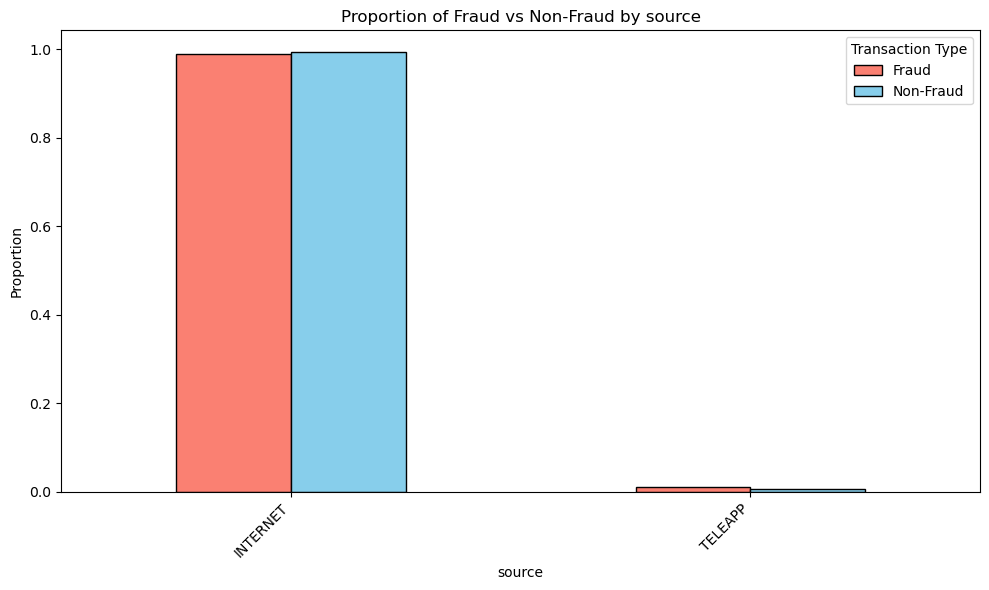


=== Fraud Cases Distribution by source ===
  source  Count  Proportion  Percentage
INTERNET  10917    0.989845       98.98
 TELEAPP    112    0.010155        1.02

=== Non-Fraud Cases Distribution by source ===
  source  Count  Proportion  Percentage
INTERNET 982035    0.992987        99.3
 TELEAPP   6936    0.007013         0.7


In [119]:
source_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
source_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['source'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['source'].value_counts()  
fraud_proportions = fraud_counts / source_counts_fraud
non_fraud_proportions = non_fraud_counts / source_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by source')
plt.xlabel('source')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by source ===")
summary_df_fraud_by_source = pd.DataFrame({
    'source': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_source.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by source ===")
summary_df_non_fraud_by_source = pd.DataFrame({
    'source': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_source.to_string(index=False))

**Not important factor the source**

In [120]:
dataset=dataset.drop(columns="source",axis='columns')

### device_os

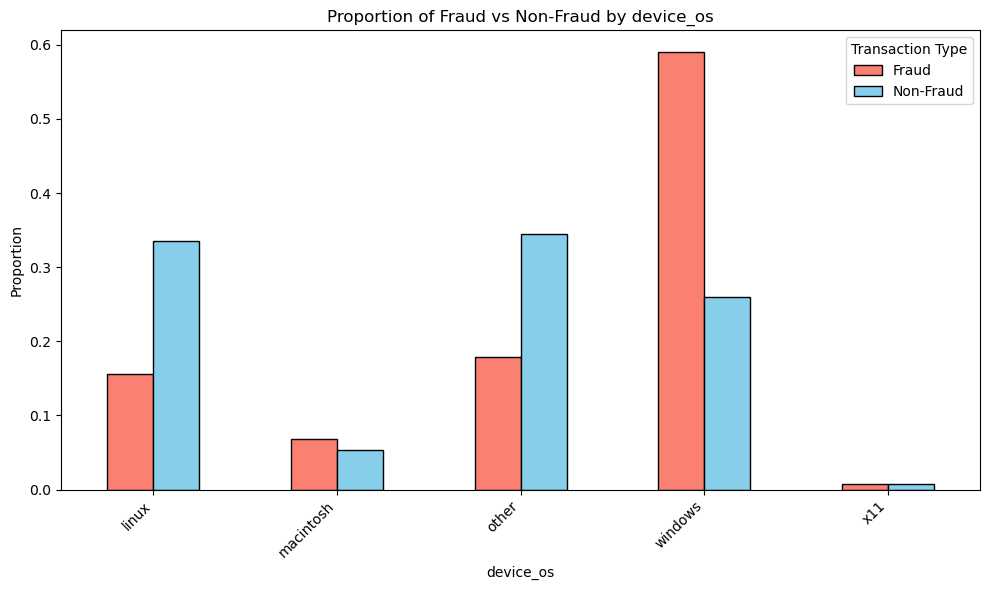


=== Fraud Cases Distribution by device_os ===
device_os  Count  Proportion  Percentage
  windows   6507    0.589990       59.00
    other   1974    0.178983       17.90
    linux   1715    0.155499       15.55
macintosh    752    0.068184        6.82
      x11     81    0.007344        0.73

=== Non-Fraud Cases Distribution by device_os ===
device_os  Count  Proportion  Percentage
    other 340754    0.344554       34.46
    linux 330997    0.334688       33.47
  windows 256999    0.259865       25.99
macintosh  53074    0.053666        5.37
      x11   7147    0.007227        0.72


In [121]:
device_os_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
device_os_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['device_os'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['device_os'].value_counts()  
fraud_proportions = fraud_counts / device_os_counts_fraud
non_fraud_proportions = non_fraud_counts / device_os_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by device_os')
plt.xlabel('device_os')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by device_os ===")
summary_df_fraud_by_device_os = pd.DataFrame({
    'device_os': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_device_os.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by device_os ===")
summary_df_non_fraud_by_device_os = pd.DataFrame({
    'device_os': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_device_os.to_string(index=False))

**Inference** Fraud users tend to use more windows than non fraud while linux users tend to have less fraud which may be due to the closed-source of linux, macintosh.

### keep_alive_session

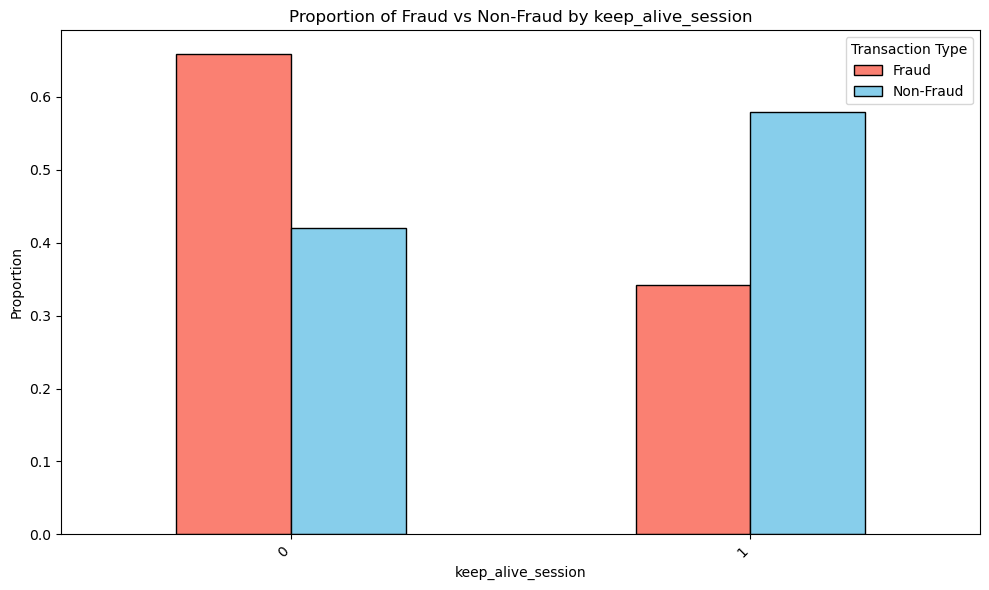


=== Fraud Cases Distribution by keep_alive_session ===
 keep_alive_session  Count  Proportion  Percentage
                  0   7261    0.658355       65.84
                  1   3768    0.341645       34.16

=== Non-Fraud Cases Distribution by keep_alive_session ===
 keep_alive_session  Count  Proportion  Percentage
                  1 573179    0.579571       57.96
                  0 415792    0.420429       42.04


In [122]:
keep_alive_session_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
keep_alive_session_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['keep_alive_session'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['keep_alive_session'].value_counts()  
fraud_proportions = fraud_counts / keep_alive_session_counts_fraud
non_fraud_proportions = non_fraud_counts / keep_alive_session_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by keep_alive_session')
plt.xlabel('keep_alive_session')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by keep_alive_session ===")
summary_df_fraud_by_keep_alive_session = pd.DataFrame({
    'keep_alive_session': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_keep_alive_session.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by keep_alive_session ===")
summary_df_non_fraud_by_keep_alive_session = pd.DataFrame({
    'keep_alive_session': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_keep_alive_session.to_string(index=False))

**Slight** effect since among fraud users we observe that the majority is users without live session.

### device_distinct_emails_8w

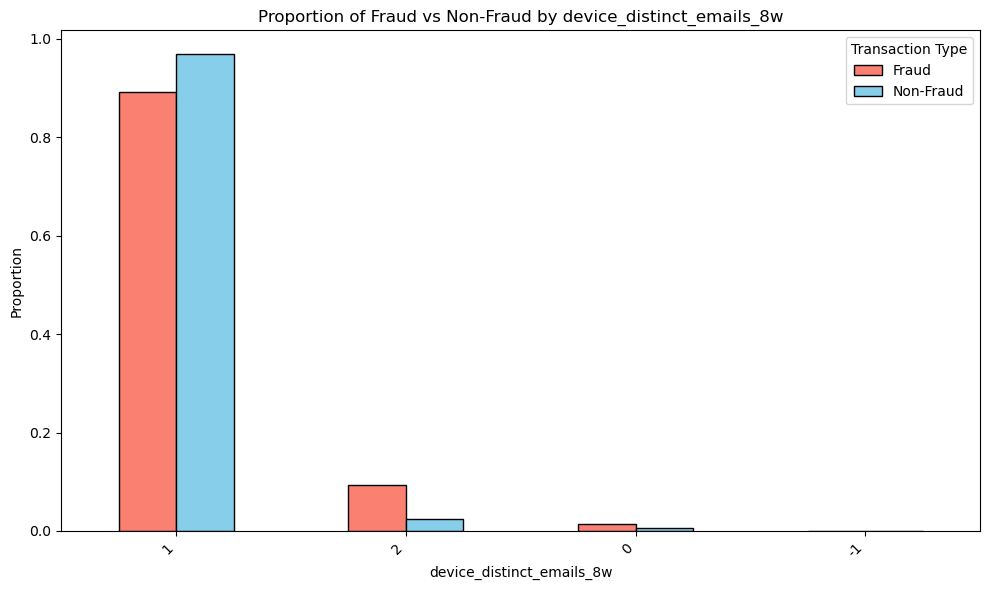


=== Fraud Cases Distribution by device_distinct_emails_8w ===
 device_distinct_emails_8w  Count  Proportion  Percentage
                         1   9839    0.892103       89.21
                         2   1035    0.093844        9.38
                         0    151    0.013691        1.37
                        -1      4    0.000363        0.04

=== Non-Fraud Cases Distribution by device_distinct_emails_8w ===
 device_distinct_emails_8w  Count  Proportion  Percentage
                         1 958228    0.968914       96.89
                         2  24267    0.024538        2.45
                         0   6121    0.006189        0.62
                        -1    355    0.000359        0.04


In [123]:
device_distinct_emails_8w_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
device_distinct_emails_8w_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['device_distinct_emails_8w'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['device_distinct_emails_8w'].value_counts()  
fraud_proportions = fraud_counts / device_distinct_emails_8w_counts_fraud
non_fraud_proportions = non_fraud_counts / device_distinct_emails_8w_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by device_distinct_emails_8w')
plt.xlabel('device_distinct_emails_8w')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by device_distinct_emails_8w ===")
summary_df_fraud_by_device_distinct_emails_8w = pd.DataFrame({
    'device_distinct_emails_8w': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_device_distinct_emails_8w.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by device_distinct_emails_8w ===")
summary_df_non_fraud_by_device_distinct_emails_8w = pd.DataFrame({
    'device_distinct_emails_8w': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_device_distinct_emails_8w.to_string(index=False))

**Slight** indication that between fraud and non-fraud users, the fraud users indicate that when they use 2 distinct emails more chances to be fraud while for <2 e-mails more non-fraud cases.

### device_fraud_count

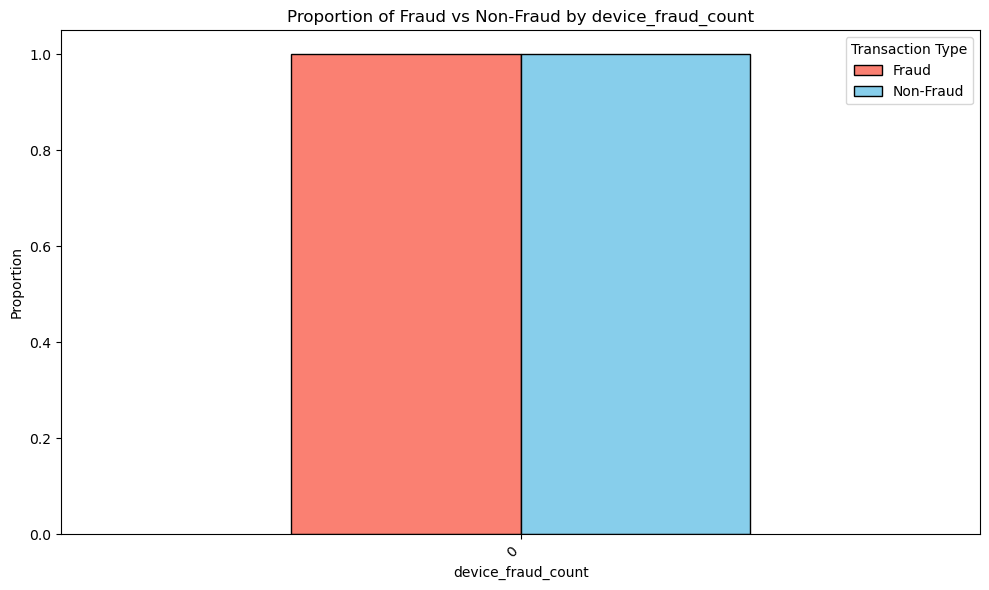


=== Fraud Cases Distribution by device_fraud_count
 device_fraud_count  Count  Proportion  Percentage
                  0  11029         1.0       100.0

=== Non-Fraud Cases Distribution by device_fraud_count
 device_fraud_count  Count  Proportion  Percentage
                  0 988971         1.0       100.0


In [124]:
device_fraud_count_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
device_fraud_count_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['device_fraud_count'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['device_fraud_count'].value_counts()  
fraud_proportions = fraud_counts / device_fraud_count_counts_fraud
non_fraud_proportions = non_fraud_counts / device_fraud_count_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by device_fraud_count')
plt.xlabel('device_fraud_count')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by device_fraud_count")
summary_df_fraud_by_device_fraud_count = pd.DataFrame({
    'device_fraud_count': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_device_fraud_count.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by device_fraud_count")
summary_df_non_fraud_by_device_fraud_count = pd.DataFrame({
    'device_fraud_count': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_device_fraud_count.to_string(index=False))

In [125]:
dataset=dataset.drop(columns="device_fraud_count",axis='columns')

### days_since_request_binned

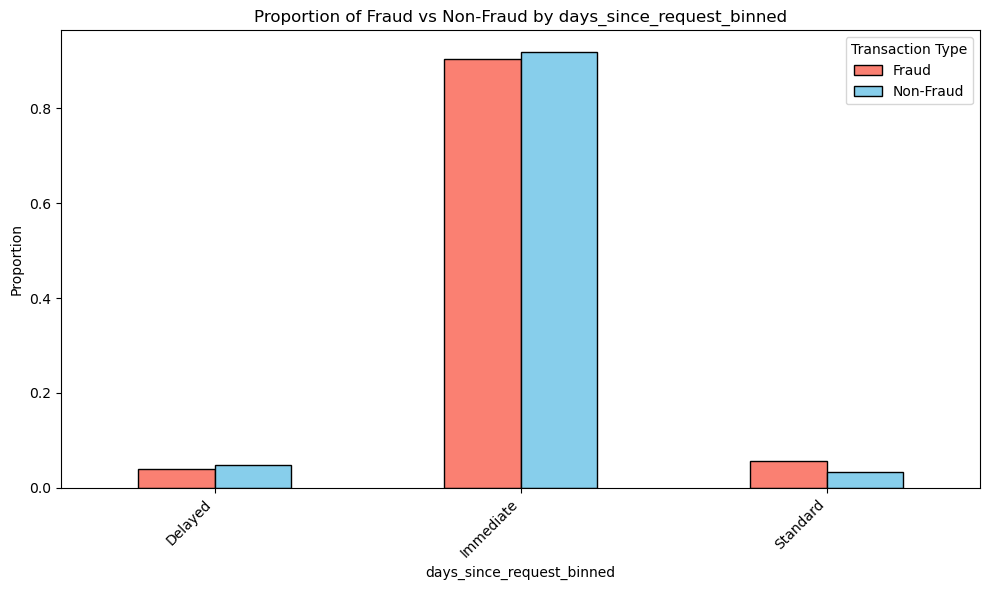


=== Fraud Cases Distribution by days_since_request_binned
days_since_request_binned  Count  Proportion  Percentage
                Immediate   9965    0.903527       90.35
                 Standard    618    0.056034        5.60
                  Delayed    446    0.040439        4.04

=== Non-Fraud Cases Distribution by days_since_request_binned
days_since_request_binned  Count  Proportion  Percentage
                Immediate 908302    0.918431       91.84
                  Delayed  48152    0.048689        4.87
                 Standard  32517    0.032880        3.29


In [126]:
days_since_request_binned_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
days_since_request_binned_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['days_since_request_binned'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['days_since_request_binned'].value_counts()  
fraud_proportions = fraud_counts / days_since_request_binned_counts_fraud
non_fraud_proportions = non_fraud_counts / days_since_request_binned_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by days_since_request_binned')
plt.xlabel('days_since_request_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by days_since_request_binned")
summary_df_fraud_by_days_since_request_binned = pd.DataFrame({
    'days_since_request_binned': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_days_since_request_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by days_since_request_binned")
summary_df_non_fraud_by_days_since_request_binned = pd.DataFrame({
    'days_since_request_binned': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_days_since_request_binned.to_string(index=False))

**Too little differences**=> no strong association.

In [127]:
dataset=dataset.drop(columns="days_since_request_log",axis='columns')

### valid_transferred_amount

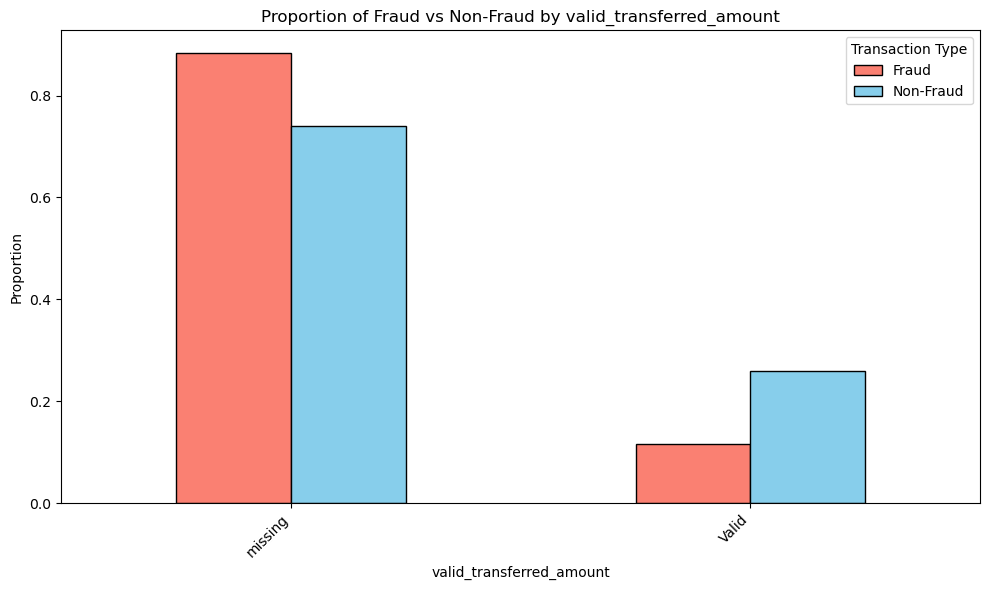


=== Fraud Cases Distribution by valid_transferred_amount
valid_transferred_amount  Count  Proportion  Percentage
                 missing   9747    0.883761       88.38
                   Valid   1282    0.116239       11.62

=== Non-Fraud Cases Distribution by valid_transferred_amount
valid_transferred_amount  Count  Proportion  Percentage
                 missing 732776    0.740948       74.09
                   Valid 256195    0.259052       25.91


In [128]:
valid_transferred_amount_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
valid_transferred_amount_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['valid_transferred_amount'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['valid_transferred_amount'].value_counts()  
fraud_proportions = fraud_counts / valid_transferred_amount_counts_fraud
non_fraud_proportions = non_fraud_counts / valid_transferred_amount_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by valid_transferred_amount')
plt.xlabel('valid_transferred_amount')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by valid_transferred_amount")
summary_df_fraud_by_valid_transferred_amount = pd.DataFrame({
    'valid_transferred_amount': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_valid_transferred_amount.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by valid_transferred_amount")
summary_df_non_fraud_by_valid_transferred_amount = pd.DataFrame({
    'valid_transferred_amount': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_valid_transferred_amount.to_string(index=False))

**Missing=> more chances to be fraud**

### intended_balcon_amount_binned

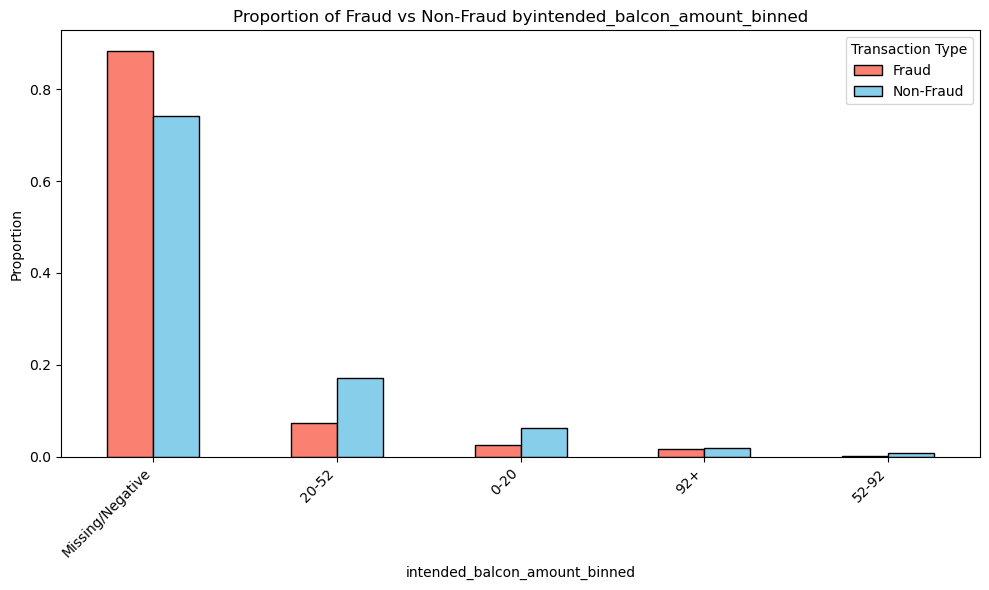


=== Fraud Cases Distribution by intended_balcon_amount_binned
intended_balcon_amount_binned  Count  Proportion  Percentage
             Missing/Negative   9747    0.883761       88.38
                        20-52    800    0.072536        7.25
                         0-20    271    0.024572        2.46
                          92+    184    0.016683        1.67
                        52-92     27    0.002448        0.24

=== Non-Fraud Cases Distribution by intended_balcon_amount_binned
intended_balcon_amount_binned  Count  Proportion  Percentage
             Missing/Negative 732776    0.740948       74.09
                        20-52 168412    0.170290       17.03
                         0-20  61897    0.062587        6.26
                          92+  18536    0.018743        1.87
                        52-92   7350    0.007432        0.74


In [129]:
intended_balcon_amount_binned_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
intended_balcon_amount_binned_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['intended_balcon_amount_binned'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['intended_balcon_amount_binned'].value_counts()  
fraud_proportions = fraud_counts / intended_balcon_amount_binned_counts_fraud
non_fraud_proportions = non_fraud_counts / intended_balcon_amount_binned_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud byintended_balcon_amount_binned')
plt.xlabel('intended_balcon_amount_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by intended_balcon_amount_binned")
summary_df_fraud_by_intended_balcon_amount_binned = pd.DataFrame({
    'intended_balcon_amount_binned': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_intended_balcon_amount_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by intended_balcon_amount_binned")
summary_df_non_fraud_by_intended_balcon_amount_binned = pd.DataFrame({
    'intended_balcon_amount_binned': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_intended_balcon_amount_binned.to_string(index=False))

Need to combine categories since categories of 52-92, 92+ have same impact but too small sample size.

In [130]:
dataset["intended_balcon_amount_binned_engineered"]=np.where(dataset["intended_balcon_amount_binned"].isin(["52-92","92+"]),"52+",dataset["intended_balcon_amount_binned"])

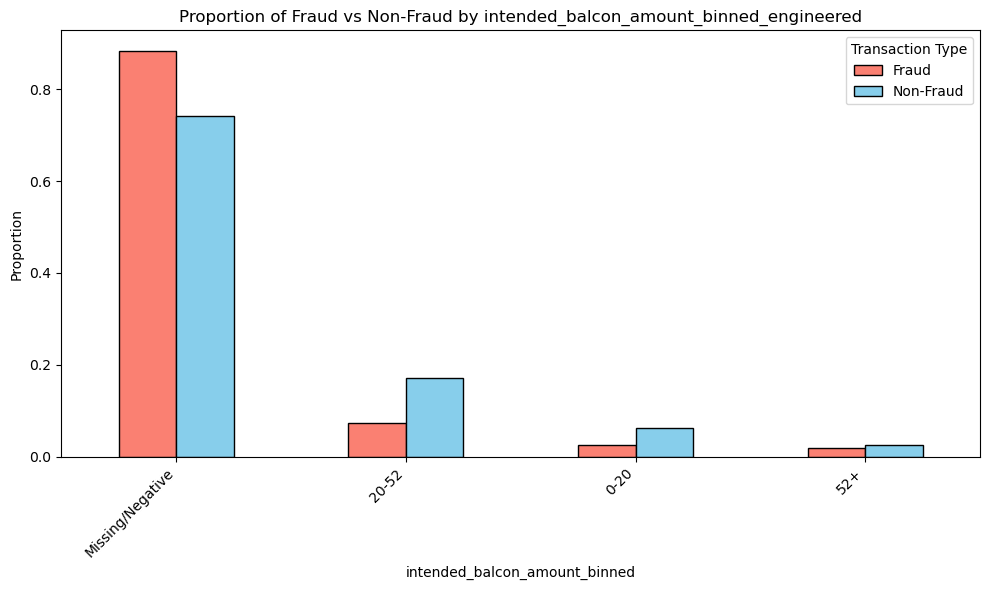


=== Fraud Cases Distribution by intended_balcon_amount_binned_engineered
intended_balcon_amount_binned_engineered  Count  Proportion  Percentage
                        Missing/Negative   9747    0.883761       88.38
                                   20-52    800    0.072536        7.25
                                    0-20    271    0.024572        2.46
                                     52+    211    0.019131        1.91

=== Non-Fraud Cases Distribution by intended_balcon_amount_binned_engineered
intended_balcon_amount_binned_engineered  Count  Proportion  Percentage
                        Missing/Negative 732776    0.740948       74.09
                                   20-52 168412    0.170290       17.03
                                    0-20  61897    0.062587        6.26
                                     52+  25886    0.026175        2.62


In [131]:
intended_balcon_amount_binned_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
intended_balcon_amount_binned_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['intended_balcon_amount_binned_engineered'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['intended_balcon_amount_binned_engineered'].value_counts()  
fraud_proportions = fraud_counts / intended_balcon_amount_binned_counts_fraud
non_fraud_proportions = non_fraud_counts / intended_balcon_amount_binned_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by intended_balcon_amount_binned_engineered')
plt.xlabel('intended_balcon_amount_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by intended_balcon_amount_binned_engineered")
summary_df_fraud_by_intended_balcon_amount_binned = pd.DataFrame({
    'intended_balcon_amount_binned_engineered': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_intended_balcon_amount_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by intended_balcon_amount_binned_engineered")
summary_df_non_fraud_by_intended_balcon_amount_binned = pd.DataFrame({
    'intended_balcon_amount_binned_engineered': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_intended_balcon_amount_binned.to_string(index=False))

**Indication** that cases with missing or negative amount may be fraud cases.

In [132]:
dataset=dataset.drop(columns="intended_balcon_amount_binned",axis='columns')

### bank_branch_count_8w_binned

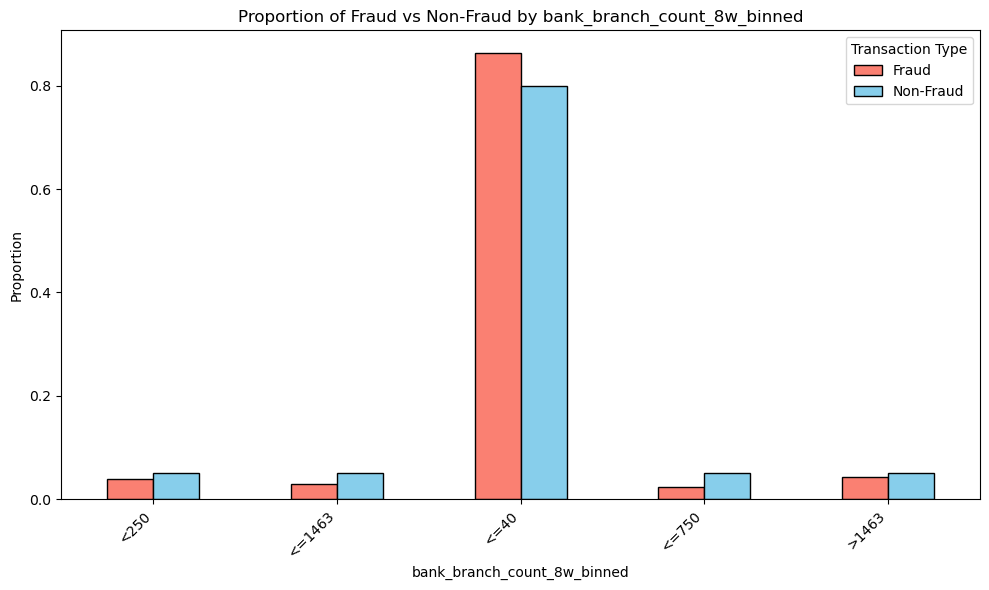


=== Fraud Cases Distribution by bank_branch_count_8w_binned
bank_branch_count_8w_binned  Count  Proportion  Percentage
                       <=40   9529    0.863995       86.40
                      >1463    473    0.042887        4.29
                       <250    435    0.039441        3.94
                     <=1463    329    0.029830        2.98
                      <=750    263    0.023846        2.38

=== Non-Fraud Cases Distribution by bank_branch_count_8w_binned
bank_branch_count_8w_binned  Count  Proportion  Percentage
                       <=40 790996    0.799817       79.98
                      <=750  49728    0.050283        5.03
                     <=1463  49673    0.050227        5.02
                      >1463  49496    0.050048        5.00
                       <250  49078    0.049625        4.96


In [133]:
bank_branch_count_8w_binned_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
bank_branch_count_8w_binned_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['bank_branch_count_8w_binned'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['bank_branch_count_8w_binned'].value_counts()  
fraud_proportions = fraud_counts / bank_branch_count_8w_binned_counts_fraud
non_fraud_proportions = non_fraud_counts / bank_branch_count_8w_binned_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by bank_branch_count_8w_binned')
plt.xlabel('bank_branch_count_8w_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by bank_branch_count_8w_binned")
summary_df_fraud_by_bank_branch_count_8w_binned = pd.DataFrame({
    'bank_branch_count_8w_binned': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_bank_branch_count_8w_binned.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by bank_branch_count_8w_binned")
summary_df_non_fraud_by_bank_branch_count_8w_binned = pd.DataFrame({
    'bank_branch_count_8w_binned': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_bank_branch_count_8w_binned.to_string(index=False))

Combine categories baving similar impact

In [134]:
dataset["bank_branch_count_8w_binned_engineered"]=np.where(dataset["bank_branch_count_8w_binned"].isin(["<=40"]),"<=40",">40")
dataset.drop(columns="bank_branch_count_8w_binned",inplace=True)
dataset.head(2)

,fraud_bool,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,proposed_credit_limit,foreign_request,device_os,keep_alive_session,device_distinct_emails_8w,month,...,customer_profile,residential_history_stability,banking_relationship_stability,velocity_6h_imputed,income_level,customer_age_binned,payment_type_engineered,employment_status_engineered,intended_balcon_amount_binned_engineered,bank_branch_count_8w_binned_engineered
0,0,5,163,1,1500.0,0,linux,1,1,0,...,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,13096.035018,<0.9,<=40 (less fraud),AA,CB,52+,<=40
1,0,18,154,1,1500.0,0,other,1,1,0,...,prev_address_missing_current_address_valid_has...,prev_address_missing_current_address_valid,bank_months_valid_has_other_cards_invalid,9223.283431,<0.9,<=40 (less fraud),Other,CA,Missing/Negative,<=40


### bank_months_count_binary

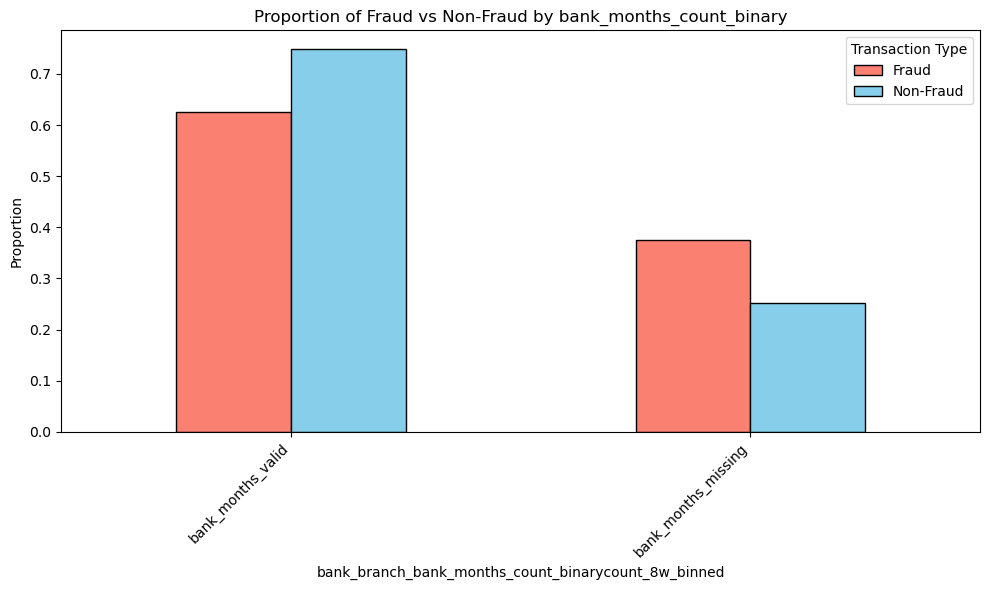


=== Fraud Cases Distribution by bank_months_count_binary
bank_months_count_binary  Count  Proportion  Percentage
       bank_months_valid   6889    0.624626       62.46
     bank_months_missing   4140    0.375374       37.54

=== Non-Fraud Cases Distribution by bank_months_count_binary
bank_months_count_binary  Count  Proportion  Percentage
       bank_months_valid 739476    0.747723       74.77
     bank_months_missing 249495    0.252277       25.23


In [135]:
bank_months_count_binary_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
bank_months_count_binary_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['bank_months_count_binary'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['bank_months_count_binary'].value_counts()  
fraud_proportions = fraud_counts / bank_months_count_binary_counts_fraud
non_fraud_proportions = non_fraud_counts / bank_months_count_binary_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by bank_months_count_binary')
plt.xlabel('bank_branch_bank_months_count_binarycount_8w_binned')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by bank_months_count_binary")
summary_df_fraud_by_bank_months_count_binary = pd.DataFrame({
    'bank_months_count_binary': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_bank_months_count_binary.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by bank_months_count_binary")
summary_df_non_fraud_by_bank_months_count_binary = pd.DataFrame({
    'bank_months_count_binary': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_bank_months_count_binary.to_string(index=False))

**more chances** to be fraud when a customer has missing data about previous account in the bank.

### month

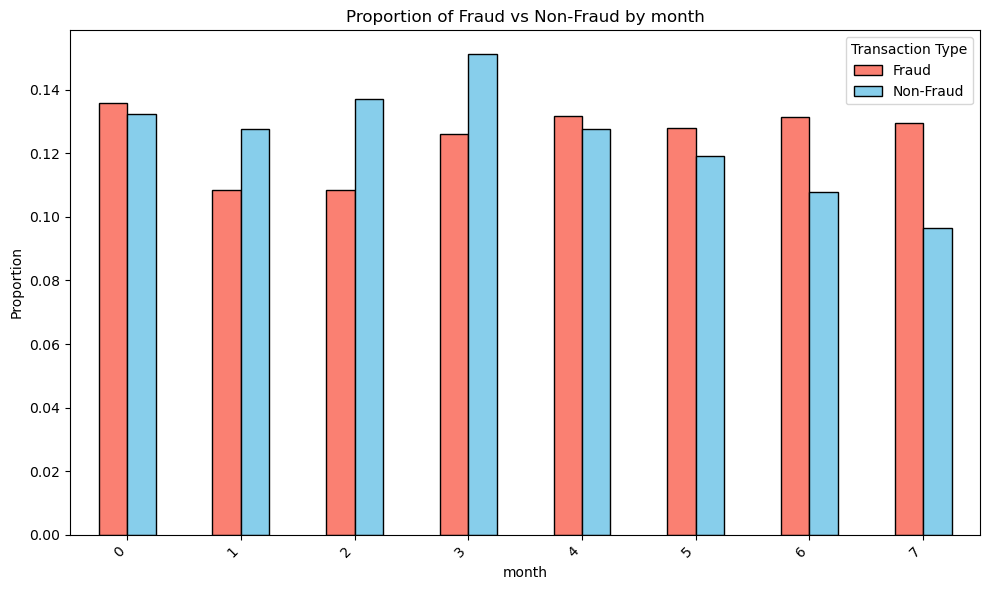


=== Fraud Cases Distribution by month ===
 month  Count  Proportion  Percentage
     0   1500    0.136005       13.60
     4   1452    0.131653       13.17
     6   1450    0.131472       13.15
     7   1428    0.129477       12.95
     5   1411    0.127935       12.79
     3   1392    0.126213       12.62
     2   1198    0.108623       10.86
     1   1198    0.108623       10.86

=== Non-Fraud Cases Distribution by month ===
 month  Count  Proportion  Percentage
     3 149544    0.151212       15.12
     2 135781    0.137295       13.73
     0 130940    0.132400       13.24
     1 126422    0.127832       12.78
     4 126239    0.127647       12.76
     5 117912    0.119227       11.92
     6 106718    0.107908       10.79
     7  95415    0.096479        9.65


In [136]:
month_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
month_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['month'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['month'].value_counts()  
fraud_proportions = fraud_counts / month_counts_fraud
non_fraud_proportions = non_fraud_counts / month_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for month (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by month')
plt.xlabel('month')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by month ===")
summary_df_fraud_by_month = pd.DataFrame({
    'month': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_month.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by month ===")
summary_df_non_fraud_by_month = pd.DataFrame({
    'month': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_month.to_string(index=False))

**Not** important relatnshiop apart from the fact that after 4th month, it seems that fraud rates were increased concerning fraud users.

### prev_address_months_binary

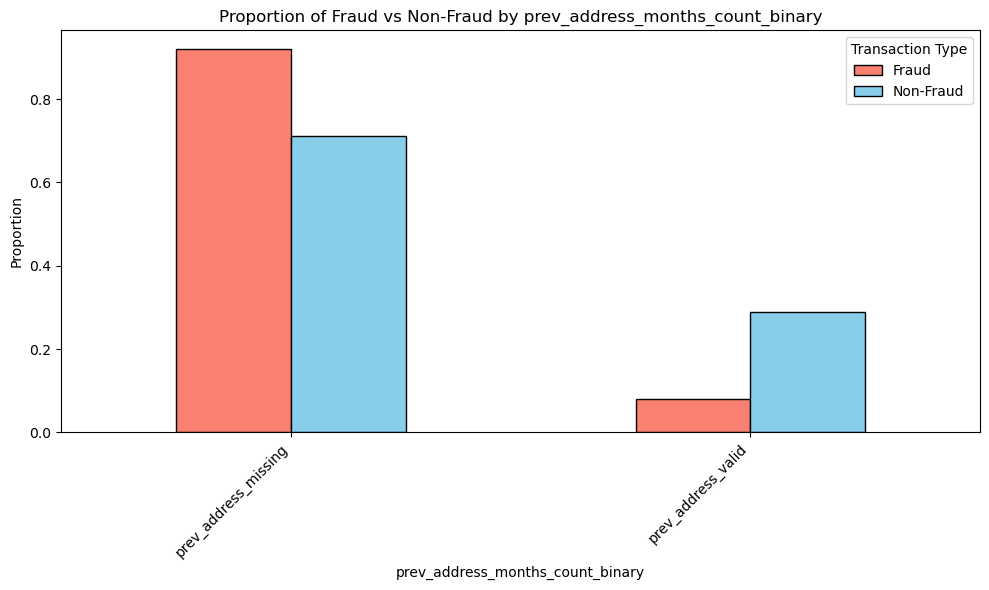


=== Fraud Cases Distribution by prev_address_months_count_binary
prev_address_months_binary  Count  Proportion  Percentage
      prev_address_missing  10134     0.91885       91.89
        prev_address_valid    895     0.08115        8.11

=== Non-Fraud Cases Distribution by prev_address_months_count_binary
prev_address_months_count_binary  Count  Proportion  Percentage
            prev_address_missing 702786    0.710623       71.06
              prev_address_valid 286185    0.289377       28.94


In [139]:
prev_address_months_binary_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
prev_address_months_binary_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['prev_address_months_count_binary'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['prev_address_months_count_binary'].value_counts()  
fraud_proportions = fraud_counts / prev_address_months_binary_counts_fraud
non_fraud_proportions = non_fraud_counts / prev_address_months_binary_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for month (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by prev_address_months_count_binary')
plt.xlabel('prev_address_months_count_binary')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by prev_address_months_count_binary")
summary_df_fraud_by_prev_address_months_binary = pd.DataFrame({
    'prev_address_months_binary': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_prev_address_months_binary.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by prev_address_months_count_binary")
summary_df_non_fraud_by_prev_address_months_binary = pd.DataFrame({
    'prev_address_months_count_binary': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_prev_address_months_binary.to_string(index=False))

**Strong association** by the means of that when the prev address is unknown/missing=> more chances to be fraud.

### residential_history_stability

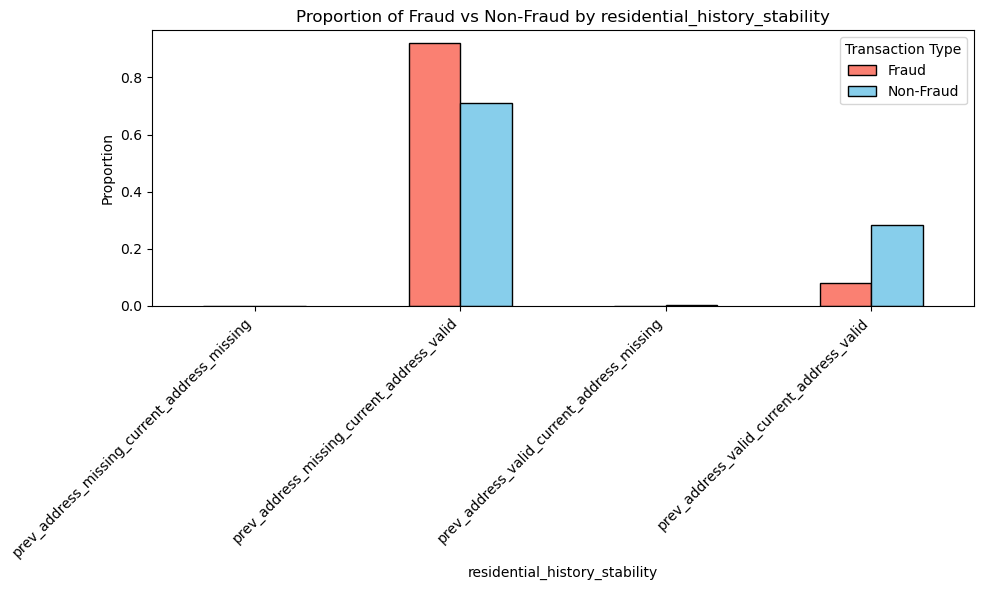


=== Fraud Cases Distribution by residential_history_stability
             residential_history_stability  Count  Proportion  Percentage
prev_address_missing_current_address_valid  10134    0.918850       91.89
  prev_address_valid_current_address_valid    881    0.079880        7.99
prev_address_valid_current_address_missing     14    0.001269        0.13

=== Non-Fraud Cases Distribution by month ===
               residential_history_stability  Count  Proportion  Percentage
  prev_address_missing_current_address_valid 702700    0.710537       71.05
    prev_address_valid_current_address_valid 282031    0.285176       28.52
  prev_address_valid_current_address_missing   4154    0.004200        0.42
prev_address_missing_current_address_missing     86    0.000087        0.01


In [140]:
residential_history_stability_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
residential_history_stability_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['residential_history_stability'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['residential_history_stability'].value_counts()  
fraud_proportions = fraud_counts / residential_history_stability_counts_fraud
non_fraud_proportions = non_fraud_counts / residential_history_stability_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for month (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by residential_history_stability')
plt.xlabel('residential_history_stability')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by residential_history_stability")
summary_df_fraud_by_residential_history_stability = pd.DataFrame({
    'residential_history_stability': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_residential_history_stability.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by month ===")
summary_df_non_fraud_by_residential_history_stability = pd.DataFrame({
    'residential_history_stability': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_residential_history_stability.to_string(index=False))

**Indication** that the current address does not play an important role of separation and it is very rare or an error that the current address is missing since application without having available such address is not valid. Also, the sample size of current address missing is too small so not need to take into account such interaction and focus **only on prev_address**

In [142]:
dataset.drop(columns="residential_history_stability",inplace=True)

### customer_profile

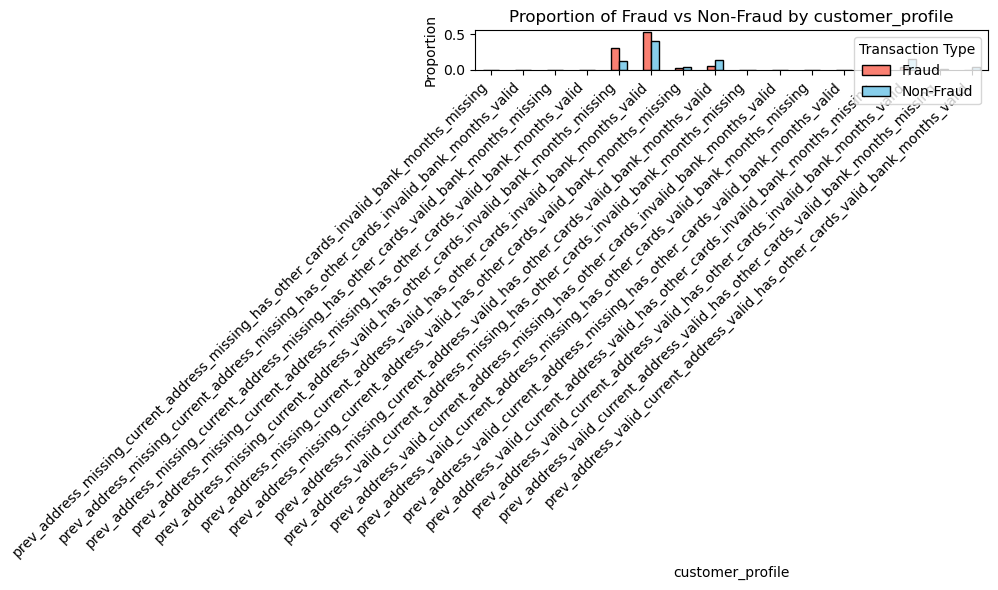


=== Fraud Cases Distribution by customer_profile ===
                                                                      customer_profile  Count  Proportion  Percentage
  prev_address_missing_current_address_valid_has_other_cards_invalid_bank_months_valid   5849    0.530329       53.03
prev_address_missing_current_address_valid_has_other_cards_invalid_bank_months_missing   3417    0.309820       30.98
    prev_address_missing_current_address_valid_has_other_cards_valid_bank_months_valid    556    0.050413        5.04
    prev_address_valid_current_address_valid_has_other_cards_invalid_bank_months_valid    439    0.039804        3.98
  prev_address_valid_current_address_valid_has_other_cards_invalid_bank_months_missing    379    0.034364        3.44
  prev_address_missing_current_address_valid_has_other_cards_valid_bank_months_missing    312    0.028289        2.83
      prev_address_valid_current_address_valid_has_other_cards_valid_bank_months_valid     33    0.002992        0.30
  

In [144]:
customer_profile_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
customer_profile_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['customer_profile'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['customer_profile'].value_counts()  
fraud_proportions = fraud_counts / customer_profile_fraud
non_fraud_proportions = non_fraud_counts / customer_profile_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for customer_profile (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by customer_profile')
plt.xlabel('customer_profile')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by customer_profile ===")
summary_df_fraud_by_customer_profile = pd.DataFrame({
    'customer_profile': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_customer_profile.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by customer_profile ===")
summary_df_non_fraud_by_customer_profile = pd.DataFrame({
    'customer_profile': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_customer_profile.to_string(index=False))

**Inference**: Since customer profile has too many categories with too small sample size as well as including interactions of features that have been already studied above, it may be a feature towards overfitting, thus need to avoid overfitting.

In [146]:
dataset.drop(columns="customer_profile",inplace=True)

### banking_relationship_stability

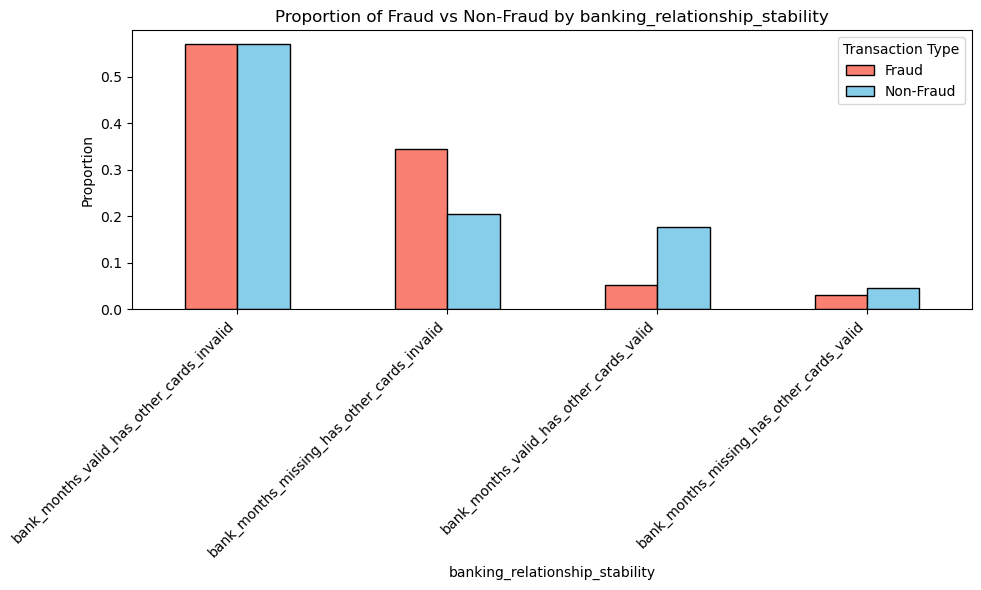


=== Fraud Cases Distribution by banking_relationship_stability ===
             banking_relationship_stability  Count  Proportion  Percentage
  bank_months_valid_has_other_cards_invalid   6300    0.571221       57.12
bank_months_missing_has_other_cards_invalid   3798    0.344365       34.44
    bank_months_valid_has_other_cards_valid    589    0.053405        5.34
  bank_months_missing_has_other_cards_valid    342    0.031009        3.10

=== Non-Fraud Cases Distribution by banking_relationship_stability
             banking_relationship_stability  Count  Proportion  Percentage
  bank_months_valid_has_other_cards_invalid 563851    0.570139       57.01
bank_months_missing_has_other_cards_invalid 203063    0.205328       20.53
    bank_months_valid_has_other_cards_valid 175625    0.177584       17.76
  bank_months_missing_has_other_cards_valid  46432    0.046950        4.69


In [148]:
banking_relationship_stability_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
banking_relationship_stability_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['banking_relationship_stability'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['banking_relationship_stability'].value_counts()  
fraud_proportions = fraud_counts / banking_relationship_stability_fraud
non_fraud_proportions = non_fraud_counts / banking_relationship_stability_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for banking_relationship_stability (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by banking_relationship_stability')
plt.xlabel('banking_relationship_stability')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by banking_relationship_stability ===")
summary_df_fraud_by_banking_relationship_stability = pd.DataFrame({
    'banking_relationship_stability': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_banking_relationship_stability.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by banking_relationship_stability")
summary_df_non_fraud_by_banking_relationship_stability = pd.DataFrame({
    'banking_relationship_stability': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_banking_relationship_stability.to_string(index=False))

**It seems slightly important association** since it is clear that when both other cards and previous account in bank are missing, there are more chances to be fraud.

In [150]:
dataset.head(1)

,fraud_bool,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,proposed_credit_limit,foreign_request,device_os,keep_alive_session,device_distinct_emails_8w,month,...,proposed_credit_limit_binned,prev_address_months_count_binary,bank_months_count_binary,banking_relationship_stability,income_level,customer_age_binned,payment_type_engineered,employment_status_engineered,intended_balcon_amount_binned_engineered,bank_branch_count_8w_binned_engineered
0,0,5,163,1,1500.0,0,linux,1,1,0,...,1000+,prev_address_missing,bank_months_valid,bank_months_valid_has_other_cards_invalid,<0.9,<=40 (less fraud),AA,CB,52+,<=40
